In [1]:
import os
import numpy as np
import xarray as xr
import pandas as pd
import seaborn as sns
import geopandas as gpd

import cartopy.crs as ccrs
import scipy.stats as stats

from matplotlib import patches
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable

## Read RE csv file from DOWN_validation_v21.ipynb
## This code use RE from Dario-QC Data

In [2]:
lon_min, lon_max, lat_min, lat_max, area, toll = 6.5, 19, 36.5, 48, 'ITALY', 0.002

Tr = [5, 10, 20, 50, 100]

In [3]:
veneto_dir = os.path.join('/','media','arturo','T9','Data','shapes','Europa','Italy')

if os.path.exists(veneto_dir):
    REGIONS = gpd.read_file(os.path.join(veneto_dir,'Italy_regions.geojson'))
else:
    raise SystemExit(f"File not found: {veneto_dir}")

# update name of REGIONS geopandas
REGIONS = REGIONS.rename(columns={"reg_name": "Region"})
REGIONS['Region'] = REGIONS['Region'].replace('Emilia Romagna', 'Emilia-Romagna')

In [4]:
obs_base = os.path.join('/','media','arturo','T9','Data','Italy', 'stations', 'Italy_raingauges')

In [5]:
ISO_names = pd.read_csv(os.path.join(obs_base,'ISO_IT_REGION_EN_QC.csv'))
ISO_names.head(2)

Region     ISO
0    Alto-Adige  IT-322
1  Aosta Valley  IT-230

In [6]:
dir_in = os.path.join(obs_base, 'QC', 'DATA_1dy', 'RE_ENSEMBLE_SAT', f'SAT_relative_error.csv')
SAT_RE = pd.read_csv(dir_in)

dir_in = os.path.join(obs_base, 'QC', 'DATA_1dy', 'RE_ENSEMBLE_SAT', f'SAT_relative_error_lat.csv')
SAT_RE_LAT = pd.read_csv(dir_in)

dir_in = os.path.join(obs_base, 'QC', 'DATA_1dy', 'RE_ENSEMBLE_SAT', f'SAT_relative_error_lon.csv')
SAT_RE_LON = pd.read_csv(dir_in)

In [7]:
dir_in = os.path.join(obs_base, 'QC', 'DATA_1dy', 'RE_ENSEMBLE_SAT', f'DOWN_relative_error.csv')
DOWN_RE = pd.read_csv(dir_in)

dir_in = os.path.join(obs_base, 'QC', 'DATA_1dy', 'RE_ENSEMBLE_SAT', f'DOWN_relative_error_lat.csv')
DOWN_RE_LAT = pd.read_csv(dir_in)

dir_in = os.path.join(obs_base, 'QC', 'DATA_1dy', 'RE_ENSEMBLE_SAT', f'DOWN_relative_error_lon.csv')
DOWN_RE_LON = pd.read_csv(dir_in)

## Relative Error

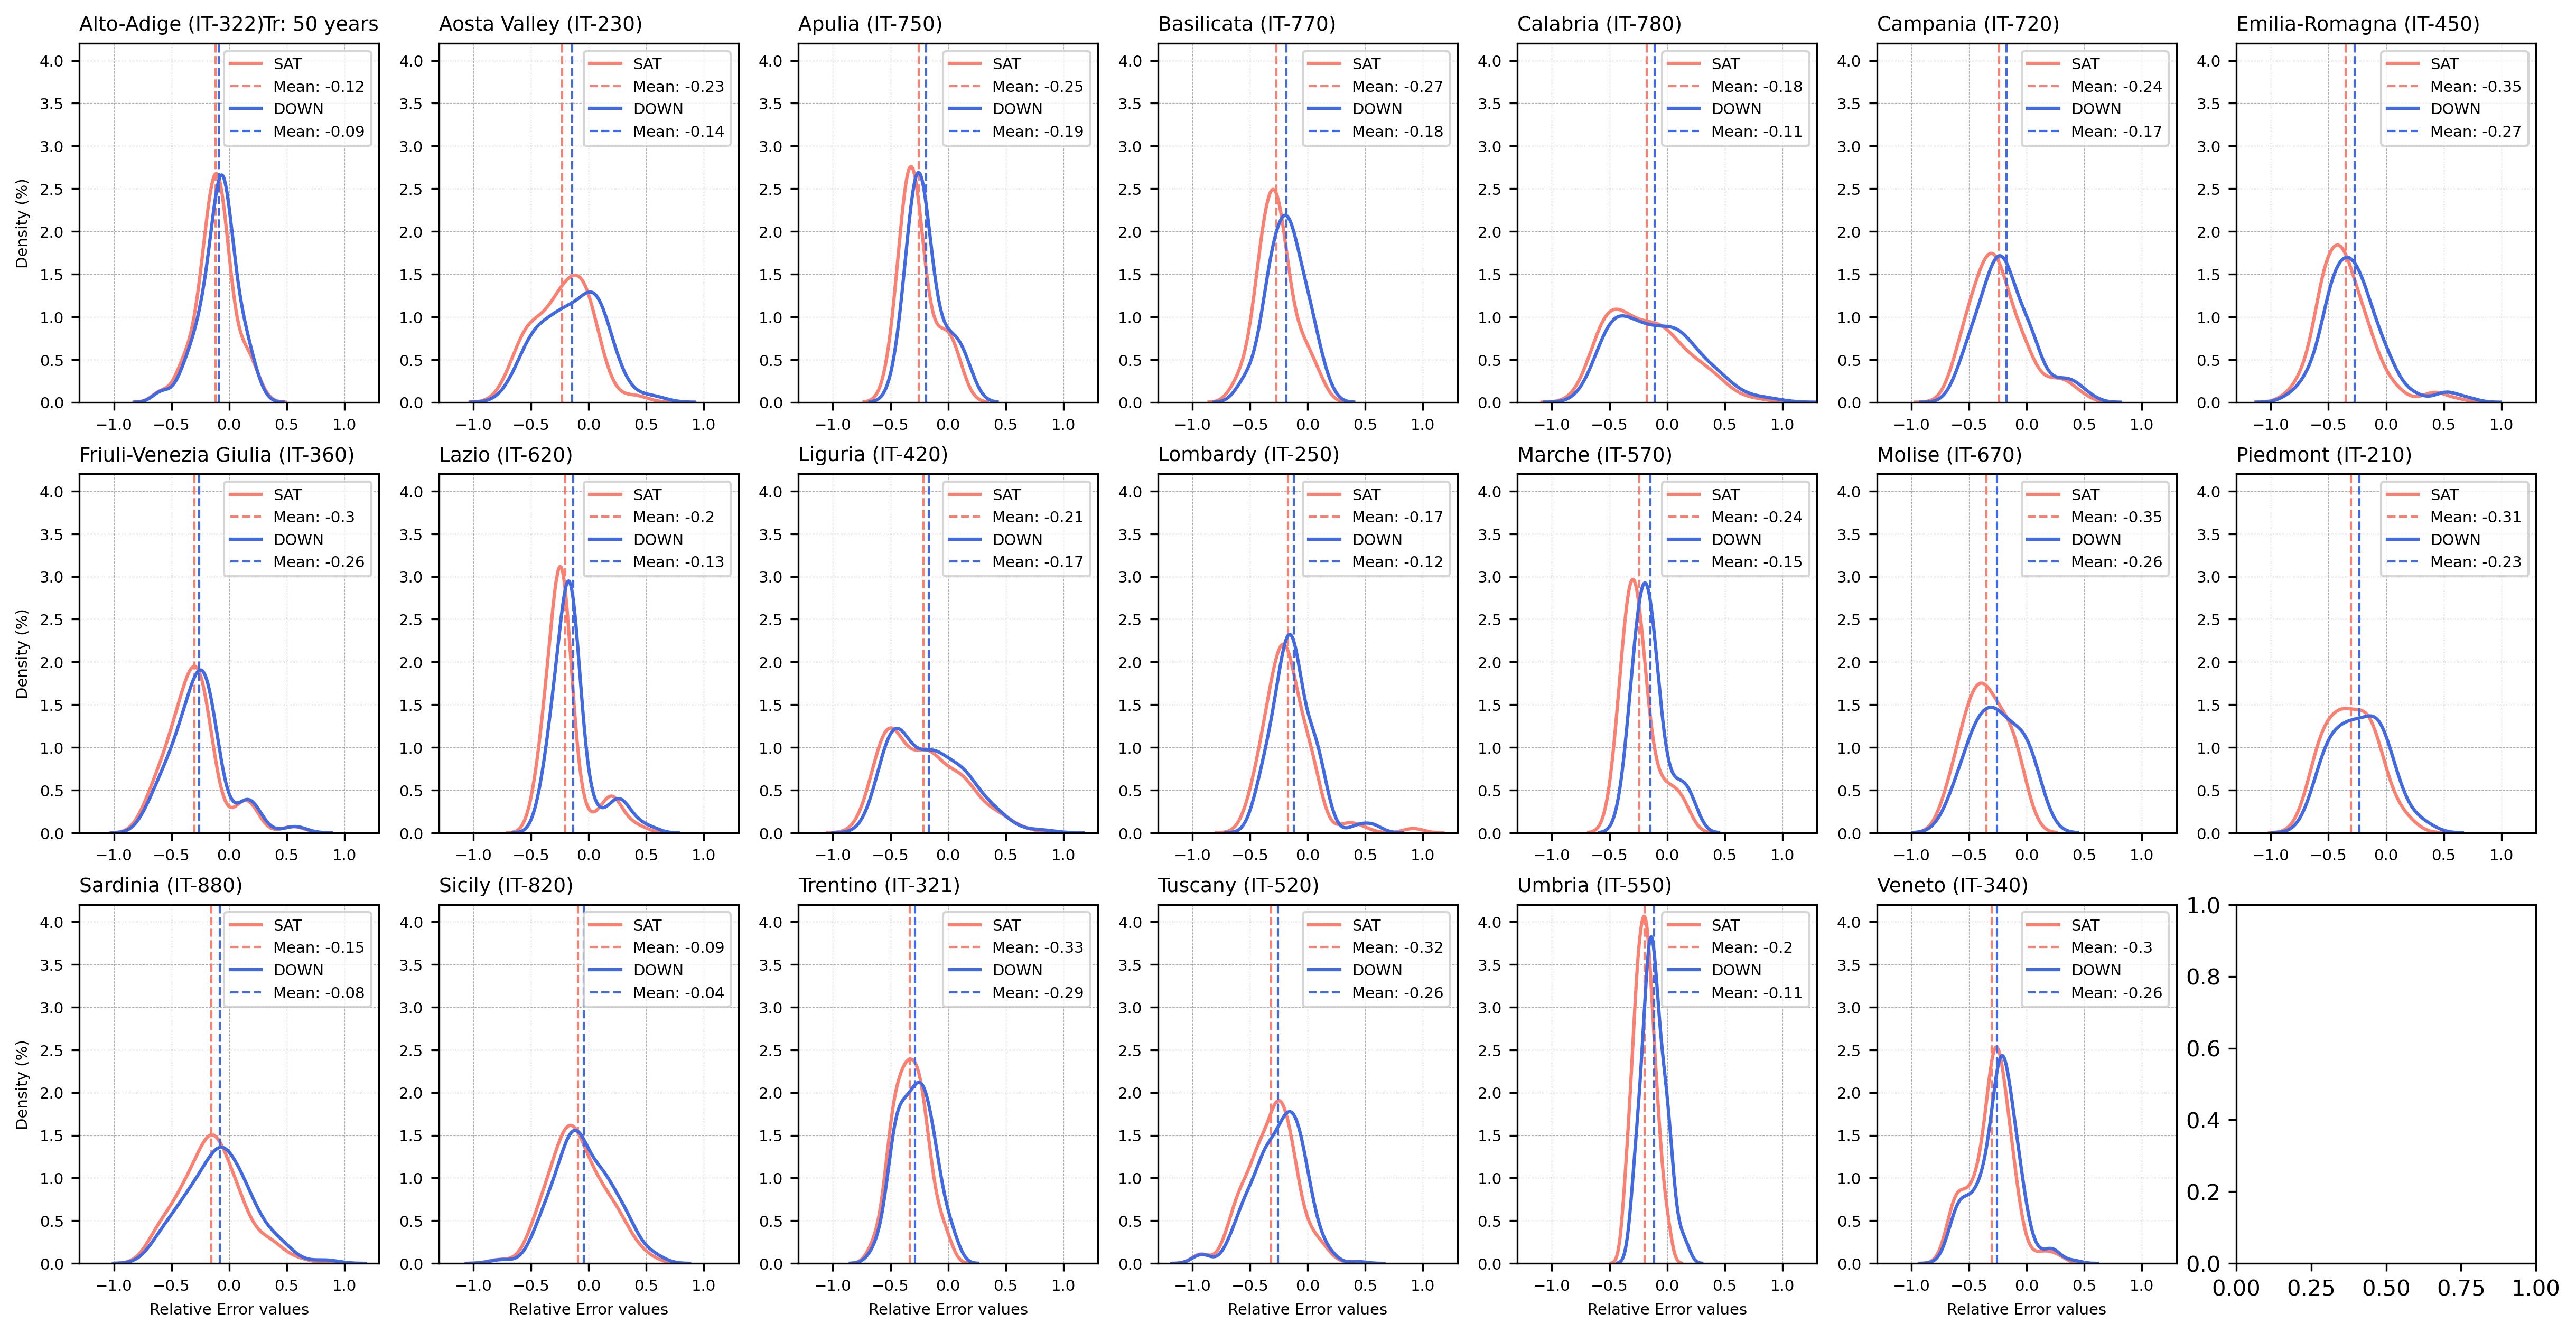

In [8]:
dict_keys = ISO_names['ISO'].values

fig = plt.figure(figsize=(20,10),dpi=300)
gs = gridspec.GridSpec(3,7)

pos = 0
for nrow in range(3):
    for ncol in range(7):
        ax1 = plt.subplot(gs[nrow, ncol])

        if pos != 20:
            SAT_RE_mean = np.round(np.nanmean(SAT_RE[dict_keys[pos]]),2)
            sns.kdeplot(SAT_RE[dict_keys[pos]],color='salmon',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'SAT')
            ax1.axvline(np.nanmean(SAT_RE[dict_keys[pos]]),color='salmon',linestyle='--',linewidth=1, label=f'Mean: {SAT_RE_mean}')

            DOWN_RE_mean = np.round(np.nanmean(DOWN_RE[dict_keys[pos]]),2)
            sns.kdeplot(DOWN_RE[dict_keys[pos]],color='royalblue',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'DOWN')
            ax1.axvline(np.nanmean(DOWN_RE[dict_keys[pos]]),color='royalblue',linestyle='--',linewidth=1, label=f'Mean: {DOWN_RE_mean}')

            ax1.set_xlim(-1.3,1.3)
            ax1.set_ylim(0,4.2)
            ax1.legend(fontsize=7, loc=1, ncol=1)
            ax1.grid(linewidth=0.3, linestyle='--')
            ax1.tick_params(axis='both', which='major', labelsize=7)

            if ncol == 0:
                ax1.set_ylabel('')
                ax1.set_ylabel('Density (%)',fontsize=7)
                if nrow == 0:
                    ax1.set_title(f'Tr: 50 years', fontsize=9, loc='right')
            else:
                ax1.set_ylabel('')

            if nrow == 2:
                ax1.set_xlabel('Relative Error values',fontsize=7) 
            else:
                ax1.set_xlabel('')

            region_l = ISO_names[ISO_names['ISO']==dict_keys[pos]].values[0][0]
            ISO_l = ISO_names[ISO_names['ISO']==dict_keys[pos]].values[0][1]
            ax1.set_title(f'{region_l} ({ISO_l})', fontsize=9, loc='left')

            pos += 1

## Boxplot

Text(1.0, 1.0, 'Return Time: 50 yrs')

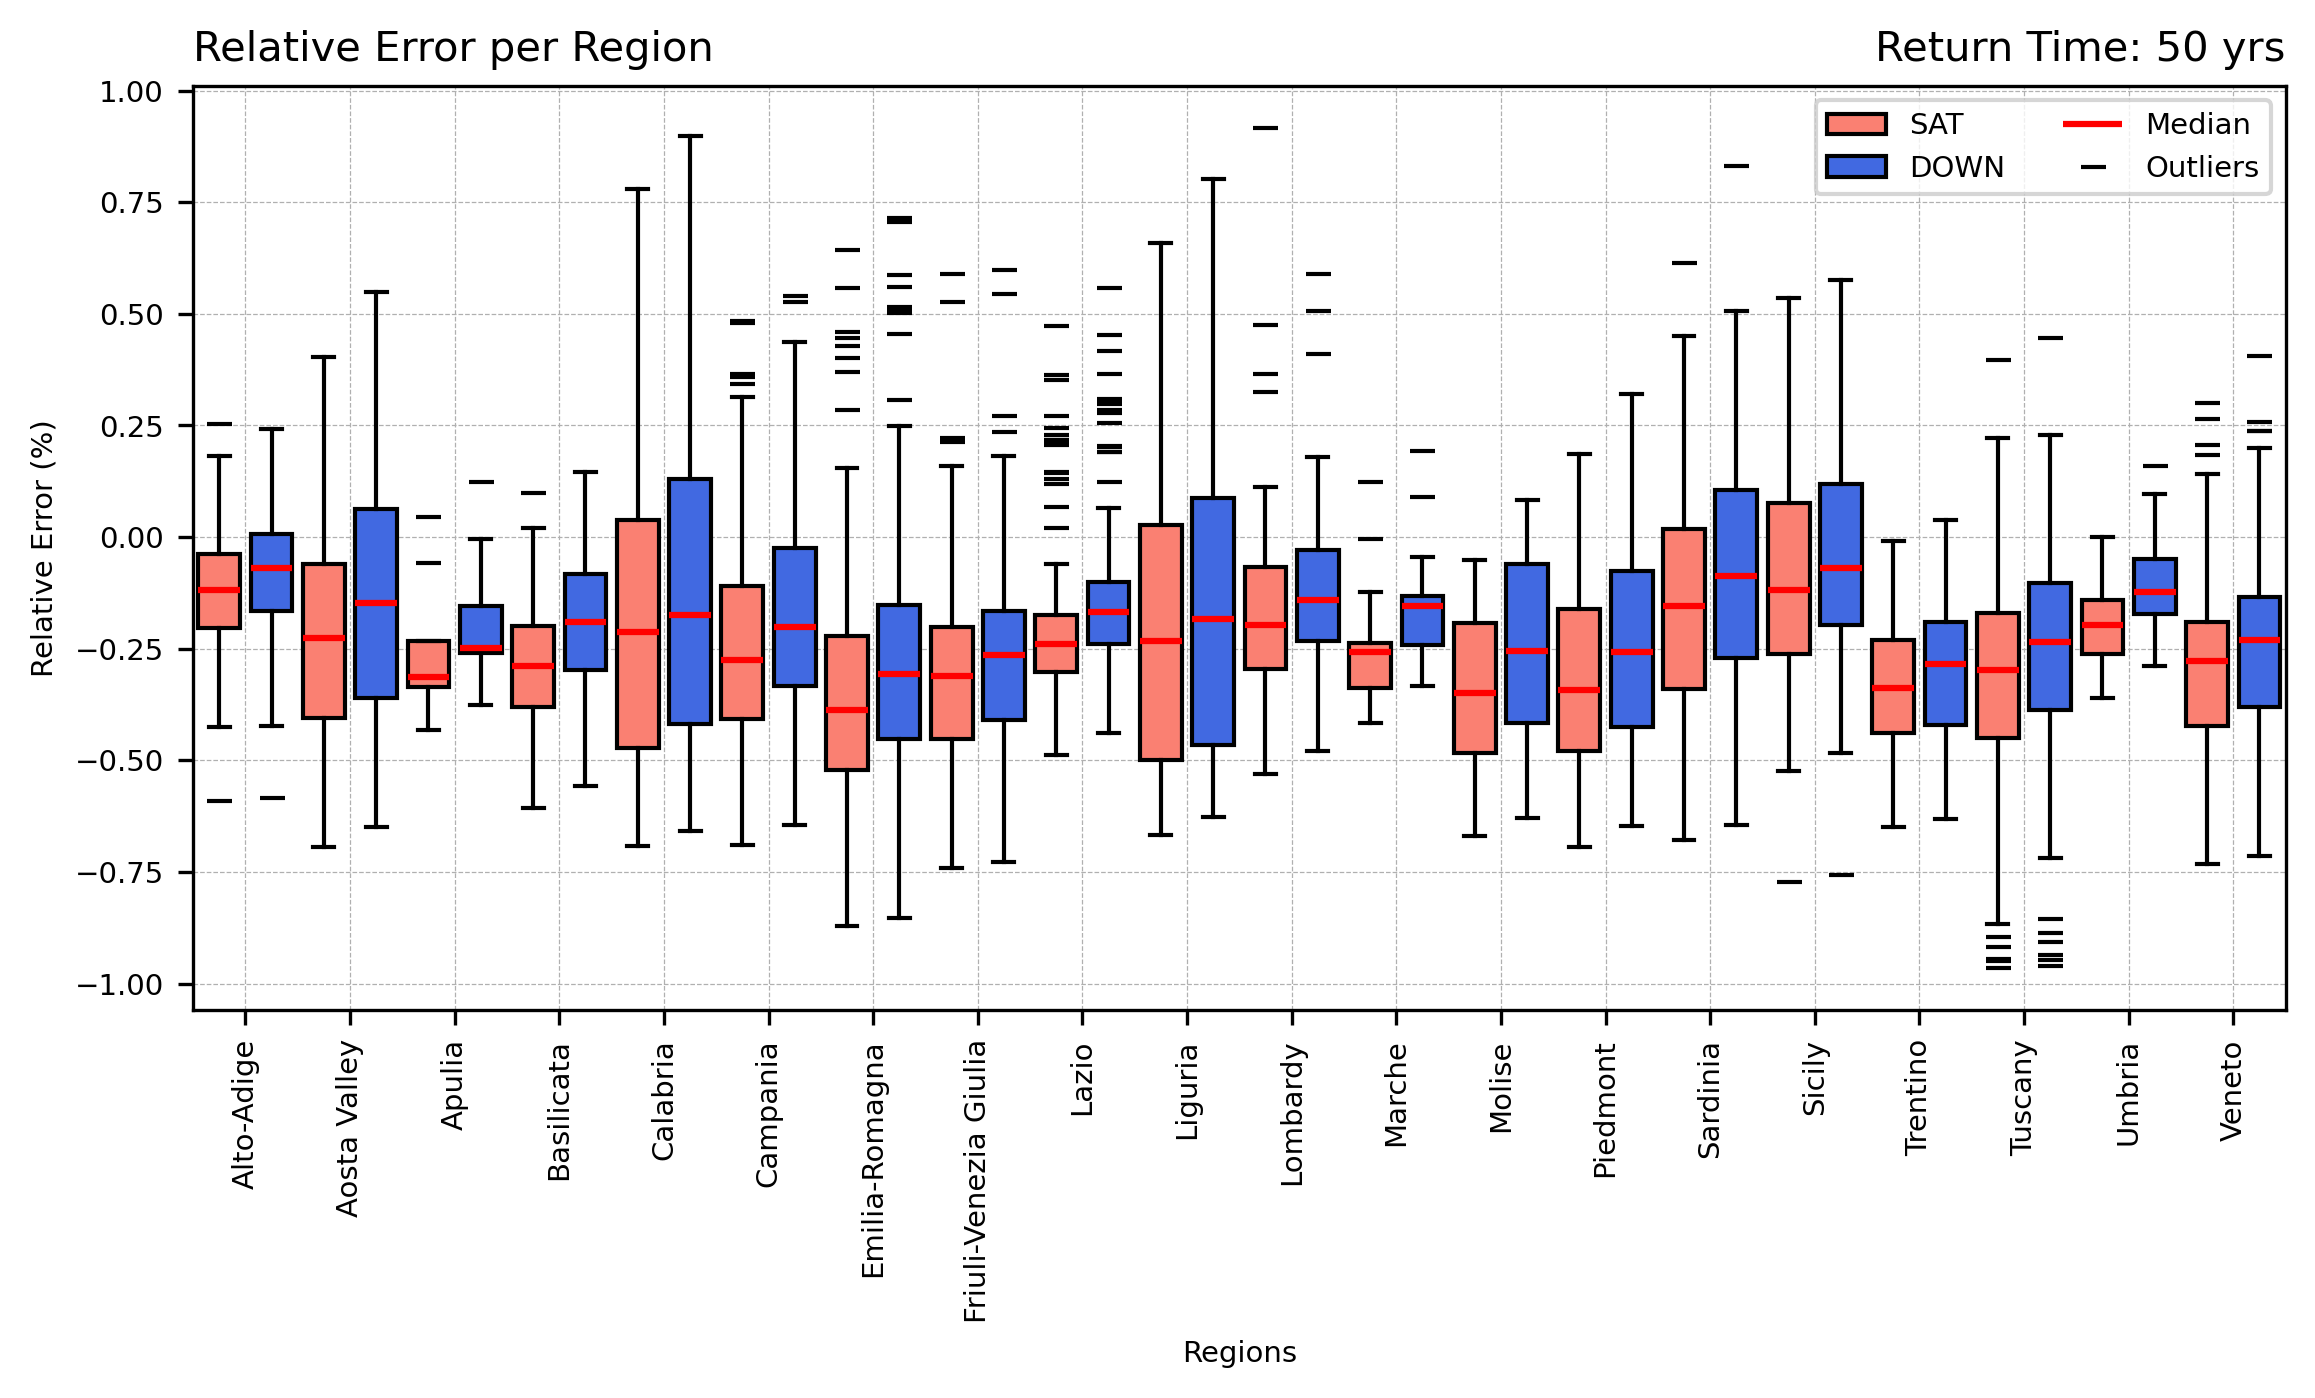

In [9]:
box_width = 0.8
x_pos = np.arange(0.5,40,2)

fig = plt.figure(figsize=(9,4),dpi=300)
gs = gridspec.GridSpec(1,1)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0])

SAT_boxprops = dict(facecolor='salmon')
DOWN_boxprops = dict(facecolor='royalblue')

meanprops=dict(linestyle='-',color="g",linewidth=1.5)
flierprops = dict(marker='_',markeredgecolor='k',linewidth=1.5)
medianprops = dict(linestyle='-', linewidth=1.5, color='r')

SAT_boxes = []
DOWN_boxes = []
medians = []
fliers = []
for pos in range(len(dict_keys)):

    SAT_tmp = SAT_RE[dict_keys[pos]]
    SAT_tmp = SAT_tmp[~np.isnan(SAT_tmp)]
    SAT_box = ax1.boxplot(SAT_tmp,positions=[2*pos],
    widths=box_width,boxprops=SAT_boxprops,
    showmeans=False,meanline=True,meanprops=meanprops,
    medianprops=medianprops,
    showfliers=True,flierprops=flierprops,
    patch_artist=True,notch=False)

    DOWN_tmp = DOWN_RE[dict_keys[pos]]
    DOWN_tmp = DOWN_tmp[~np.isnan(DOWN_tmp)]
    DOWN_box = ax1.boxplot(DOWN_tmp,positions=[2*pos+1],
    widths=box_width,boxprops=DOWN_boxprops,
    showmeans=False,meanline=True,meanprops=meanprops,
    medianprops=medianprops,
    showfliers=True,flierprops=flierprops,
    patch_artist=True,notch=False)

    SAT_boxes.append(SAT_box["boxes"][0])
    DOWN_boxes.append(DOWN_box["boxes"][0])
    medians.append(SAT_box["medians"][0])
    fliers.append(SAT_box["fliers"][0])

ax1.plot([],[],linestyle='-',c='r',label='Median')
ax1.plot([],[],linestyle='-',c='k',label='Outliers')

ax1.tick_params(axis='both', which='major', labelsize=7)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(ISO_names['Region'].values, rotation='vertical')

ax1.grid(linewidth=0.3, linestyle='--')

ax1.legend([SAT_boxes[0], DOWN_boxes[0], medians[0], fliers[0]],
        ['SAT', 'DOWN', 'Median', 'Outliers'], 
        ncol=2,fontsize=7,loc=1)

ax1.set_ylabel('Relative Error (%)', fontsize=7)
ax1.set_xlabel('Regions', fontsize=7)

ax1.set_title('Relative Error per Region', fontsize=10, loc='left')
ax1.set_title('Return Time: 50 yrs', fontsize=10, loc='right')

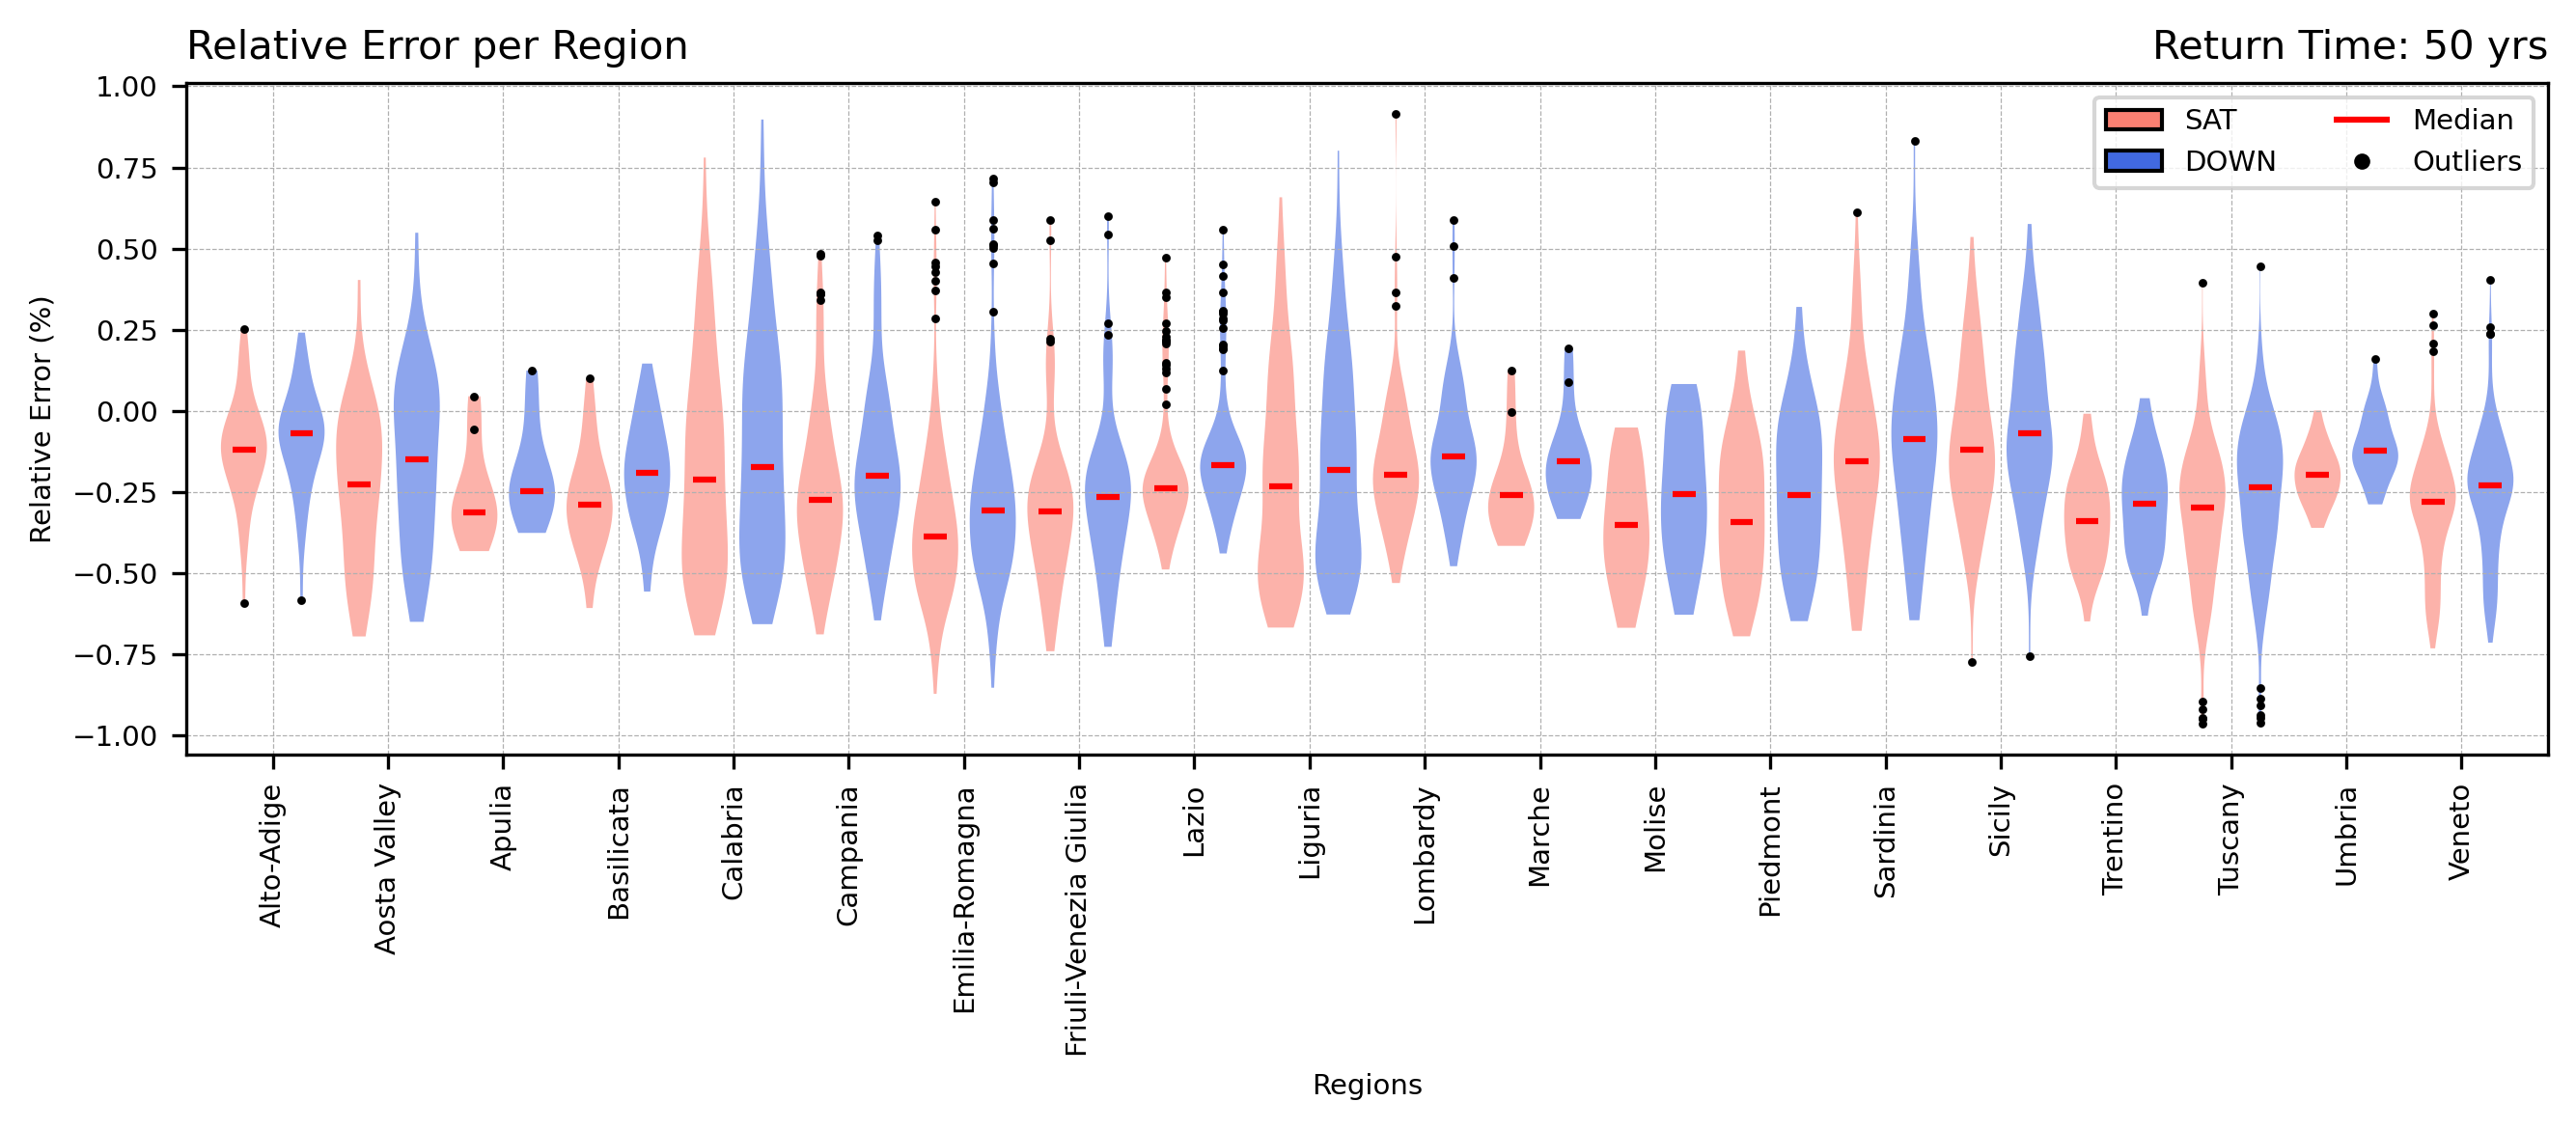

In [10]:
box_width = 0.8
x_pos = np.arange(0.5, 40, 2)

fig = plt.figure(figsize=(9,4), dpi=300)
gs = gridspec.GridSpec(1,1)

ax1 = plt.subplot(gs[0, 0])

# Colores personalizados
SAT_color = "salmon"
DOWN_color = "royalblue"

SAT_bodies = []
DOWN_bodies = []

for pos in range(len(dict_keys)):
    # ====================================================================================
    # SAT
    SAT_tmp = SAT_RE[dict_keys[pos]]
    SAT_tmp = SAT_tmp[~np.isnan(SAT_tmp)]

    SAT_vio = ax1.violinplot(SAT_tmp, positions=[2*pos], widths=box_width,
                            showmeans=False, showextrema=False, showmedians=True)
    for b in SAT_vio['bodies']:
        b.set_facecolor(SAT_color)
        b.set_alpha(0.6)
    SAT_vio['cmedians'].set_color("r")
    SAT_bodies.append(SAT_vio['bodies'][0])
    
    Q1 = np.percentile(SAT_tmp, 25)
    Q3 = np.percentile(SAT_tmp, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_SAT = SAT_tmp[(SAT_tmp < lower_bound) | (SAT_tmp > upper_bound)]
    ax1.scatter(np.repeat(2*pos, len(outliers_SAT)), outliers_SAT,
                color="k", marker=".", s=5, zorder=20, label="Outliers" if pos==0 else "")

    # ====================================================================================
    # DOWN
    DOWN_tmp = DOWN_RE[dict_keys[pos]]
    DOWN_tmp = DOWN_tmp[~np.isnan(DOWN_tmp)]

    DOWN_vio = ax1.violinplot(DOWN_tmp, positions=[2*pos+1], widths=box_width,
                            showmeans=False, showextrema=False, showmedians=True)
    for b in DOWN_vio['bodies']:
        b.set_facecolor(DOWN_color)
        b.set_alpha(0.6)
    DOWN_vio['cmedians'].set_color("r")
    DOWN_bodies.append(DOWN_vio['bodies'][0])
    
    Q1 = np.percentile(DOWN_tmp, 25)
    Q3 = np.percentile(DOWN_tmp, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_DOWN = DOWN_tmp[(DOWN_tmp < lower_bound) | (DOWN_tmp > upper_bound)]
    ax1.scatter(np.repeat(2*pos+1, len(outliers_DOWN)), outliers_DOWN,
                color="k", marker=".", s=5, zorder=20, label="Outliers" if pos==0 else "")

out = ax1.plot([],[],'.',c='k',label='Outliers')[0]

# Ejes y leyenda
ax1.tick_params(axis='both', which='major', labelsize=7)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(ISO_names['Region'].values, rotation='vertical')
ax1.set_xlim(-1,40)

ax1.grid(linewidth=0.3, linestyle='--')

ax1.legend(
    [SAT_boxes[0], DOWN_boxes[0], medians[0], out],
    ['SAT', 'DOWN', 'Median', 'Outliers'], 
    ncol=2, fontsize=7, loc=1
)

ax1.set_ylabel('Relative Error (%)', fontsize=7)
ax1.set_xlabel('Regions', fontsize=7)

ax1.set_title('Relative Error per Region', fontsize=10, loc='left')
ax1.set_title('Return Time: 50 yrs', fontsize=10, loc='right')

plt.tight_layout()


## Mean Relative Error

In [11]:
SAT_mean = []
SAT_median = []
DOWN_mean = []
DOWN_median = []
for pos in range(len(ISO_names)):
    SAT_mean.append(float(np.nanmean(SAT_RE[ISO_names['ISO'].values[pos]])))
    SAT_median.append(float(np.nanmedian(SAT_RE[ISO_names['ISO'].values[pos]])))
    DOWN_mean.append(float(np.nanmean(DOWN_RE[ISO_names['ISO'].values[pos]])))
    DOWN_median.append(float(np.nanmedian(DOWN_RE[ISO_names['ISO'].values[pos]])))

ISO_names['SAT_RE_mean'] = SAT_mean
ISO_names['DOWN_RE_mean'] = DOWN_mean
ISO_names['SAT_RE_median'] = SAT_median
ISO_names['DOWN_RE_median'] = DOWN_median

(-0.7, 0.0)

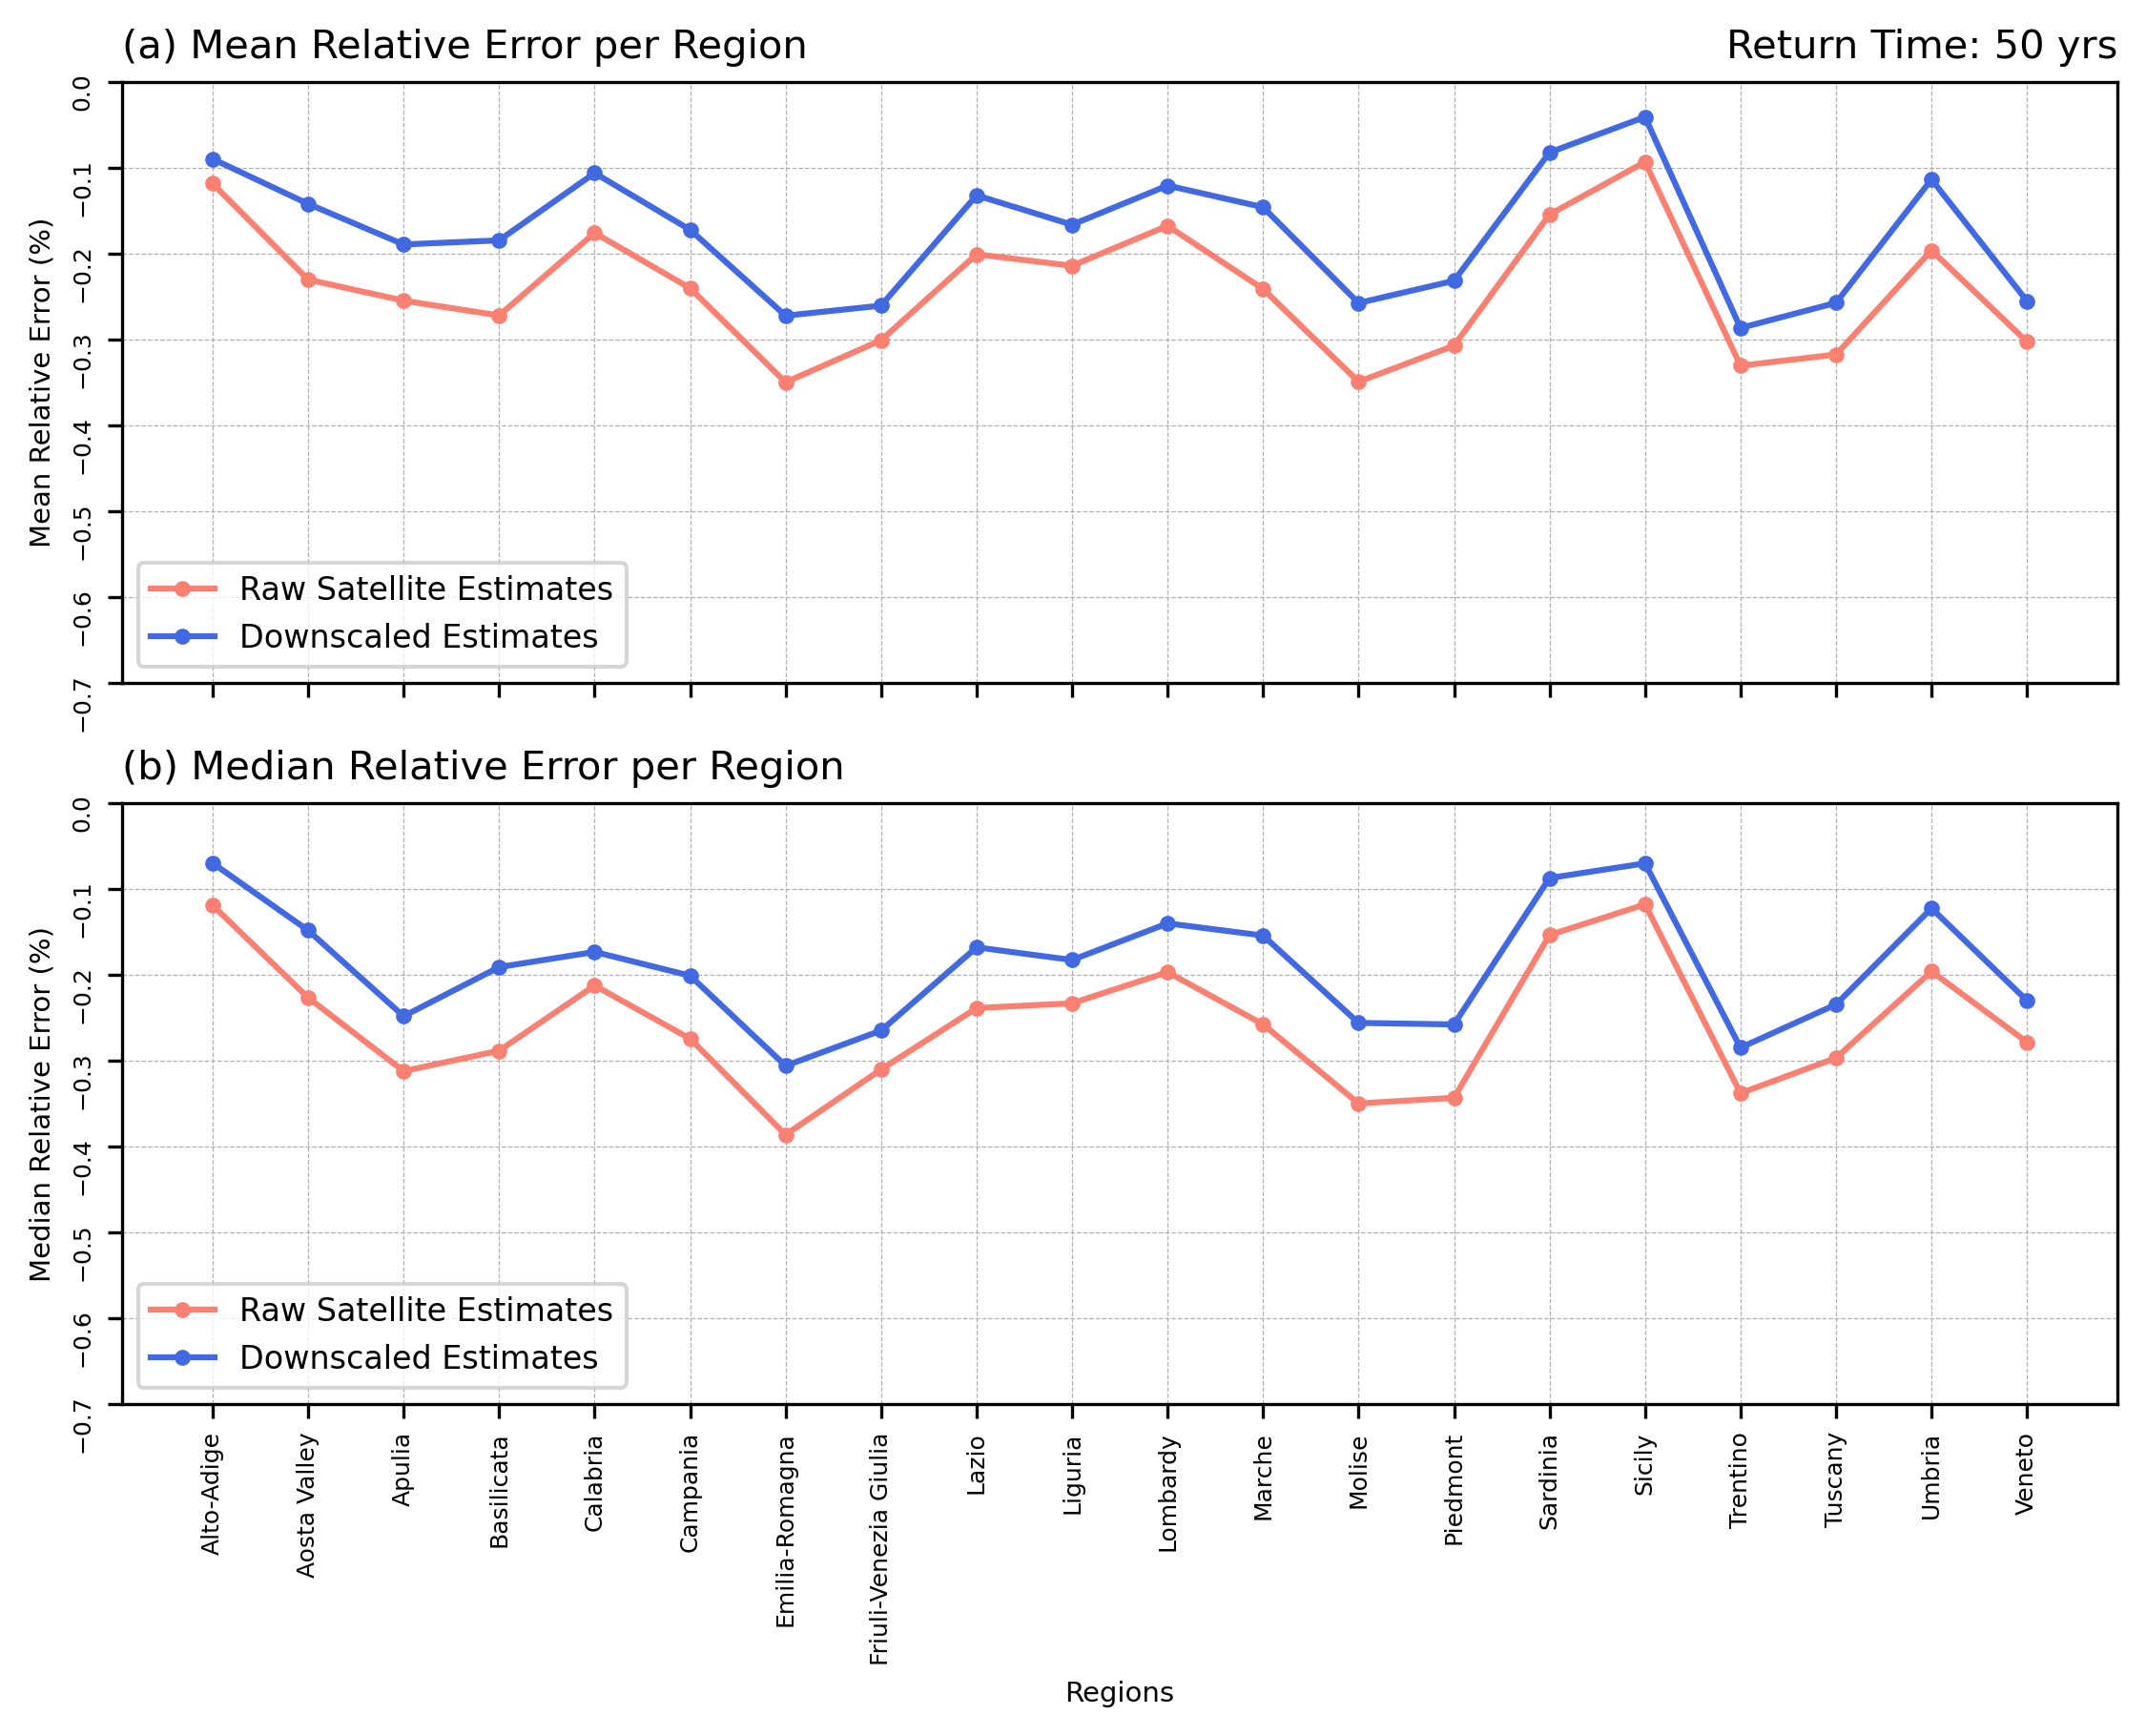

In [15]:
fig = plt.figure(figsize=(9,6),dpi=300)
gs = gridspec.GridSpec(2,1)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0])
ax1.plot(ISO_names['SAT_RE_mean'].index, ISO_names['SAT_RE_mean'].values, '.-', c='salmon', label='Raw Satellite Estimates')
ax1.plot(ISO_names['DOWN_RE_mean'].index, ISO_names['DOWN_RE_mean'].values, '.-', c='royalblue', label='Downscaled Estimates')

ax1.set_ylabel('Mean Relative Error (%)', fontsize=7)

ax1.set_xticks(ISO_names['SAT_RE_mean'].index)
ax1.set_xticklabels([])

ax1.grid(linewidth=0.3, linestyle='--')
ax1.legend(ncol=1,fontsize=8,loc=3)
ax1.tick_params(axis='both', which='major', labelsize=6, labelrotation=90)

ax1.set_title('(a) Mean Relative Error per Region', fontsize=10, loc='left')
ax1.set_title('Return Time: 50 yrs', fontsize=10, loc='right')

ax1.set_ylim(-0.7,0)

# ============================================================================================================================
ax1 = plt.subplot(gs[1, 0])
ax1.plot(ISO_names['SAT_RE_median'].index, ISO_names['SAT_RE_median'].values, '.-', c='salmon', label='Raw Satellite Estimates')
ax1.plot(ISO_names['DOWN_RE_median'].index, ISO_names['DOWN_RE_median'].values, '.-', c='royalblue', label='Downscaled Estimates')

ax1.set_ylabel('Median Relative Error (%)', fontsize=7)
ax1.set_xlabel('Regions', fontsize=7)

ax1.set_xticks(ISO_names['SAT_RE_median'].index)
ax1.set_xticklabels(ISO_names['Region'])

ax1.grid(linewidth=0.3, linestyle='--')
ax1.legend(ncol=1,fontsize=8,loc=3)
ax1.tick_params(axis='both', which='major', labelsize=6, labelrotation=90)

ax1.set_title('(b) Median Relative Error per Region', fontsize=10, loc='left')

ax1.set_ylim(-0.7,0)

## Add Geometry in ISO_names

In [13]:
REGIONS_merged = REGIONS.merge(ISO_names, on="Region")

## Spatial Mean Relative Error

In [14]:
cmap="Reds_r"
CBAR_vals = plt.cm.ScalarMappable(
    cmap=cmap,
    norm=plt.Normalize(
        vmin=np.nanmin([np.nanmin(ISO_names["SAT_RE_mean"]),np.nanmin(ISO_names["DOWN_RE_mean"])]),
        vmax=np.nanmax([np.nanmax(ISO_names["SAT_RE_mean"]),np.nanmax(ISO_names["DOWN_RE_mean"])])))

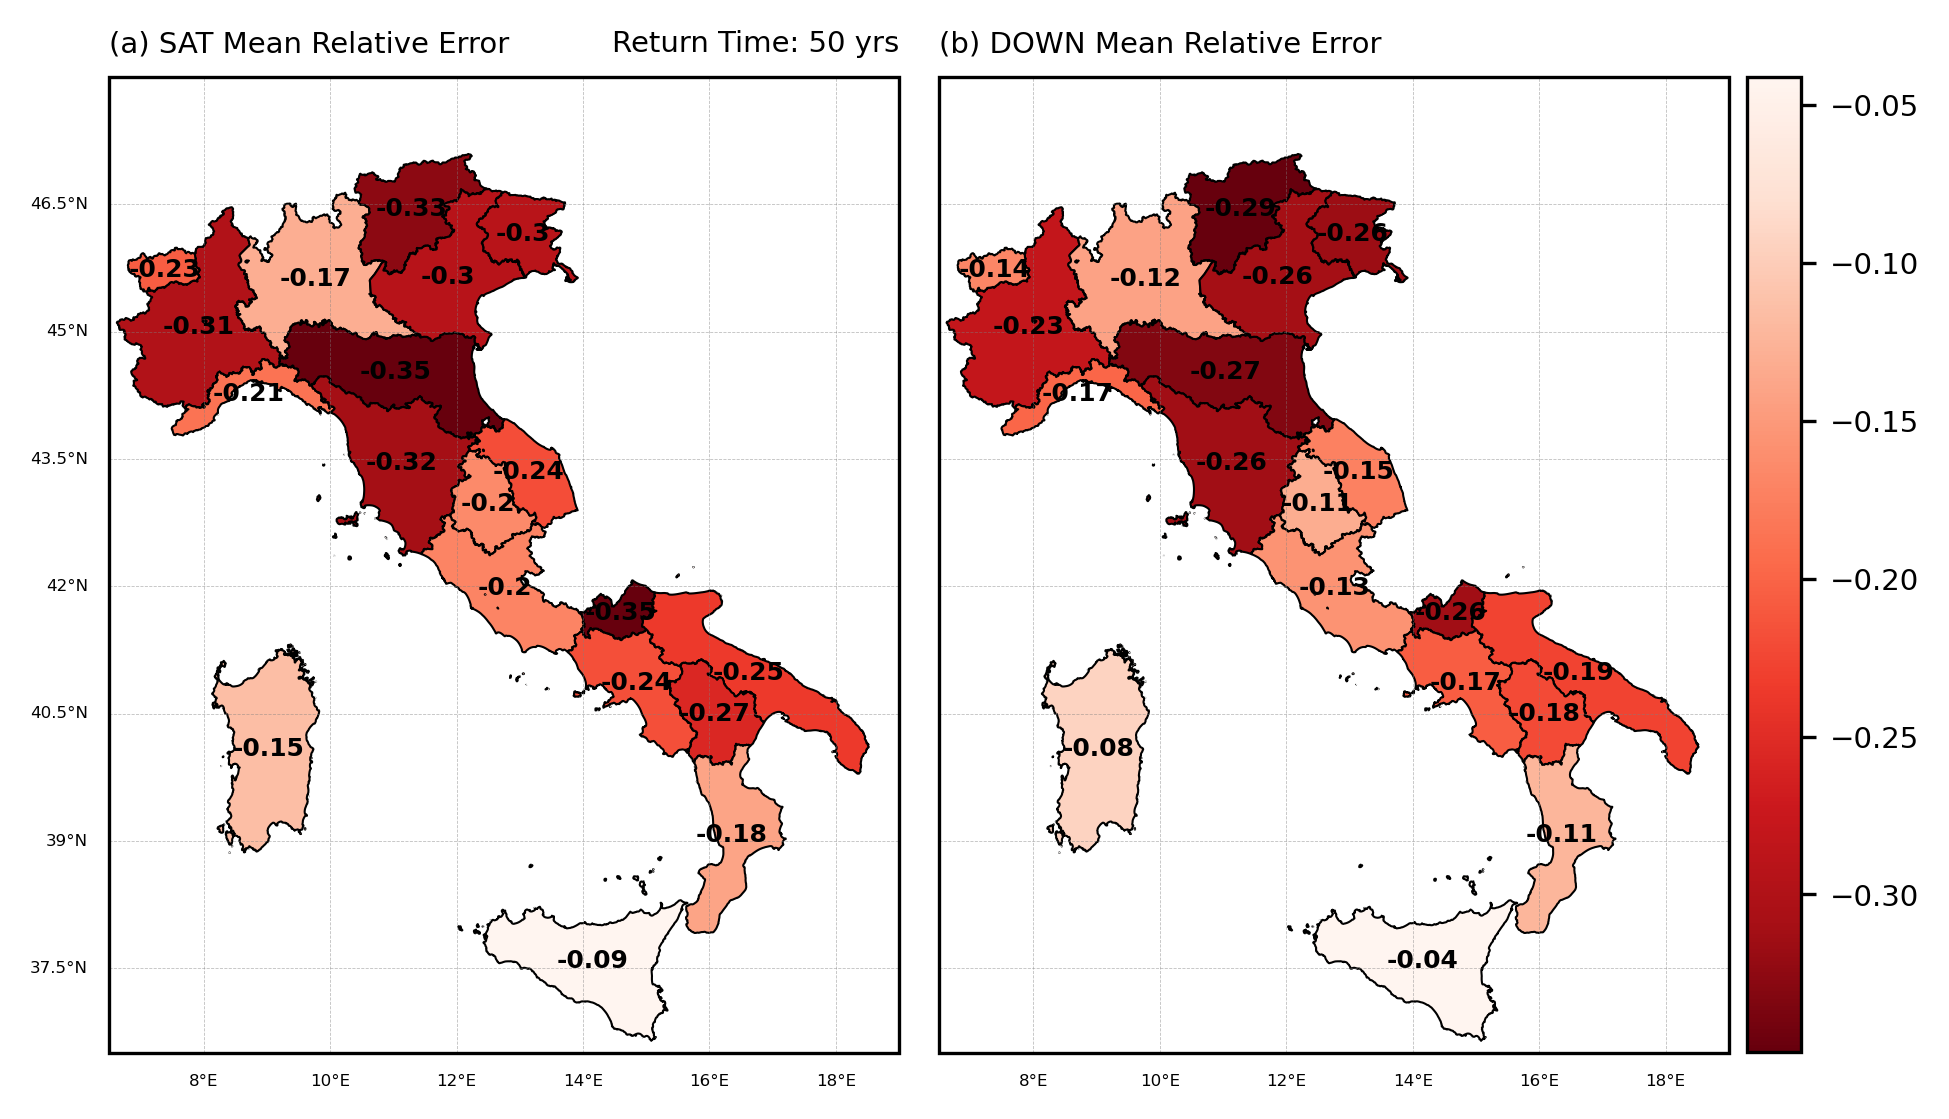

In [15]:
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(6,4),dpi=300)
gs = gridspec.GridSpec(1,2)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)

im = REGIONS_merged.plot(column="SAT_RE_mean", cmap=cmap, legend=False, edgecolor="black", linewidth=0.5, ax=ax1)

for idx, row in REGIONS.iterrows():
    if row['Region'] == 'Abruzzo':
        continue
    else:
        lon_c, lat_c = row['geometry'].centroid.xy
        lon_c = lon_c[0]
        lat_c = lat_c[0]

        val_mean_tmp = np.round(REGIONS_merged[REGIONS_merged['Region']==row['Region']]['SAT_RE_mean'].values[0],2)
        ax1.text(
            lon_c, lat_c, val_mean_tmp, 
            fontsize=6, color="k", 
            ha='center', va='center', fontweight='bold', zorder=50
        )

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels =True

gl.xlabel_style = {'size': 4, 'color': 'k'}
gl.ylabel_style = {'size': 4, 'color': 'k'}

# CBAR = plt.colorbar(
#     CBAR_vals,
#     ax=ax1,
#     ticks=np.round(ticks_level, 2),
#     fraction=0.056,
#     pad=0.03,
#     orientation="vertical")
# CBAR.ax.tick_params(labelsize=7) 

ax1.set_title('(a) SAT Mean Relative Error', fontsize=7, loc='left')
ax1.set_title('Return Time: 50 yrs', fontsize=7, loc='right')

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)

im = REGIONS_merged.plot(column="DOWN_RE_mean", cmap=cmap,legend=False, edgecolor="black", linewidth=0.5, ax=ax1)

for idx, row in REGIONS.iterrows():
    if row['Region'] == 'Abruzzo':
        continue
    else:
        lon_c, lat_c = row['geometry'].centroid.xy
        lon_c = lon_c[0]
        lat_c = lat_c[0]

        val_mean_tmp = np.round(REGIONS_merged[REGIONS_merged['Region']==row['Region']]['DOWN_RE_mean'].values[0],2)
        ax1.text(
            lon_c, lat_c, val_mean_tmp, 
            fontsize=6, color="k", 
            ha='center', va='center', fontweight='bold', zorder=50
        )

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels =False

gl.xlabel_style = {'size': 4, 'color': 'k'}
gl.ylabel_style = {'size': 4, 'color': 'k'}

# CBAR = plt.colorbar(
#     CBAR_vals,
#     ax=ax1,
#     ticks=np.round(ticks_level, 2),
#     fraction=0.056,
#     pad=0.03,
#     orientation="vertical")
# CBAR.ax.tick_params(labelsize=7) 

ax1.set_title('(b) DOWN Mean Relative Error', fontsize=7, loc='left')

# ============================================================================================================================
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.05, hspace=0.1)

cbar_ax = fig.add_axes([0.96, 0.094, 0.03, 0.813])#0.96
cbar = fig.colorbar(CBAR_vals, cax=cbar_ax, orientation='vertical')
cbar.ax.tick_params(labelsize=7)

../figures/QERROR/SAT_DOWN_RE.png


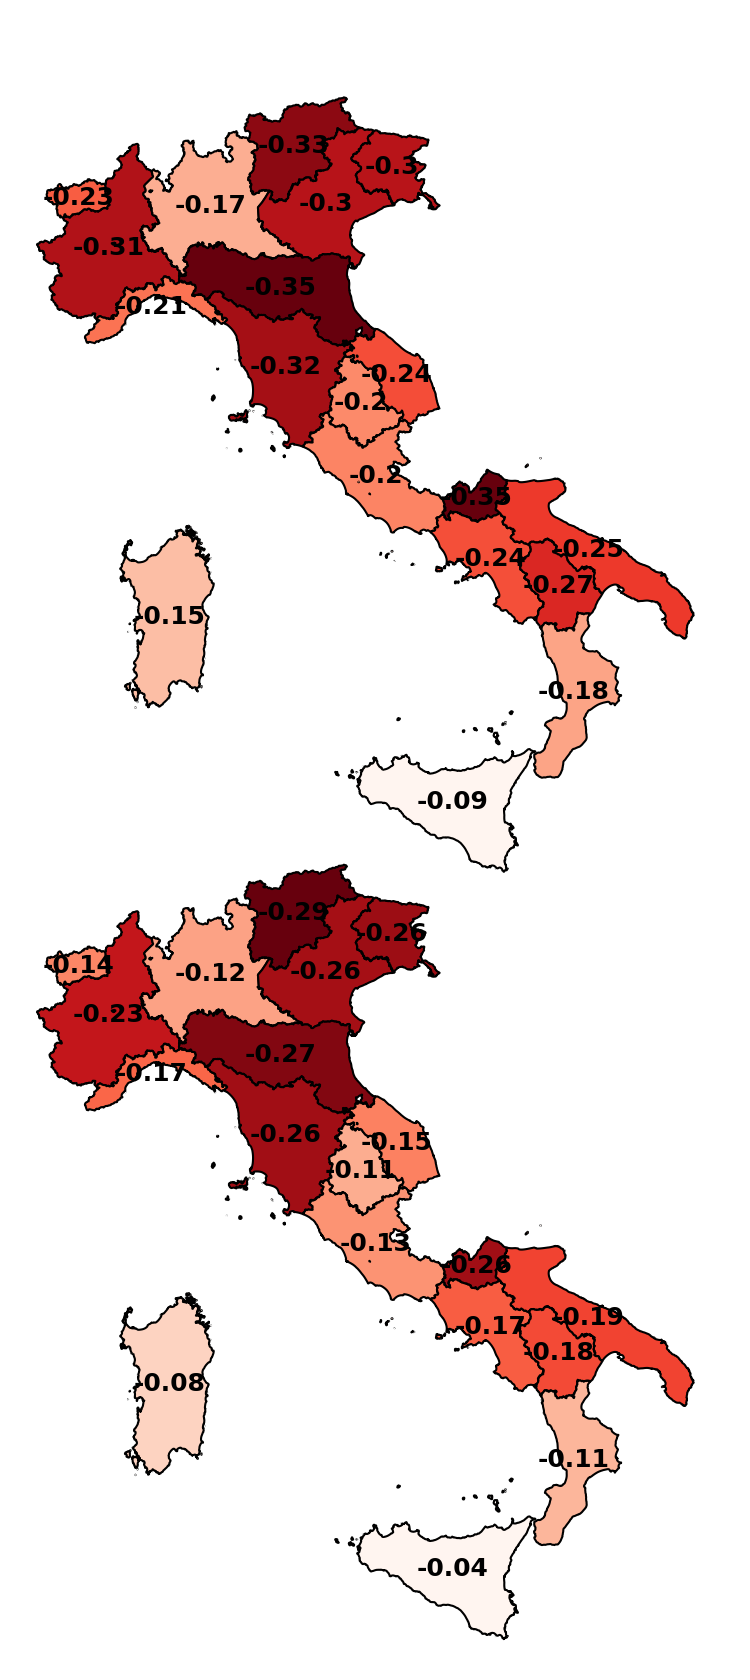

In [29]:
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(4,6),dpi=300)
gs = gridspec.GridSpec(2,1)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)

im = REGIONS_merged.plot(column="SAT_RE_mean", cmap=cmap, legend=False, edgecolor="black", linewidth=0.5, ax=ax1)

for idx, row in REGIONS.iterrows():
    if row['Region'] == 'Abruzzo':
        continue
    else:
        lon_c, lat_c = row['geometry'].centroid.xy
        lon_c = lon_c[0]
        lat_c = lat_c[0]

        val_mean_tmp = np.round(REGIONS_merged[REGIONS_merged['Region']==row['Region']]['SAT_RE_mean'].values[0],2)
        ax1.text(
            lon_c, lat_c, val_mean_tmp, 
            fontsize=6, color="k", 
            ha='center', va='center', fontweight='bold', zorder=50
        )

ax1.axis('off')

# ============================================================================================================================
ax1 = plt.subplot(gs[1, 0], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)

im = REGIONS_merged.plot(column="DOWN_RE_mean", cmap=cmap,legend=False, edgecolor="black", linewidth=0.5, ax=ax1)

for idx, row in REGIONS.iterrows():
    if row['Region'] == 'Abruzzo':
        continue
    else:
        lon_c, lat_c = row['geometry'].centroid.xy
        lon_c = lon_c[0]
        lat_c = lat_c[0]

        val_mean_tmp = np.round(REGIONS_merged[REGIONS_merged['Region']==row['Region']]['DOWN_RE_mean'].values[0],2)
        ax1.text(
            lon_c, lat_c, val_mean_tmp, 
            fontsize=6, color="k", 
            ha='center', va='center', fontweight='bold', zorder=50
        )

ax1.axis('off')

# ============================================================================================================================
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.0, hspace=-0.1)

fig.patch.set_alpha(0)

salida = '../figures/QERROR/SAT_DOWN_RE.png'
print(salida)
plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)

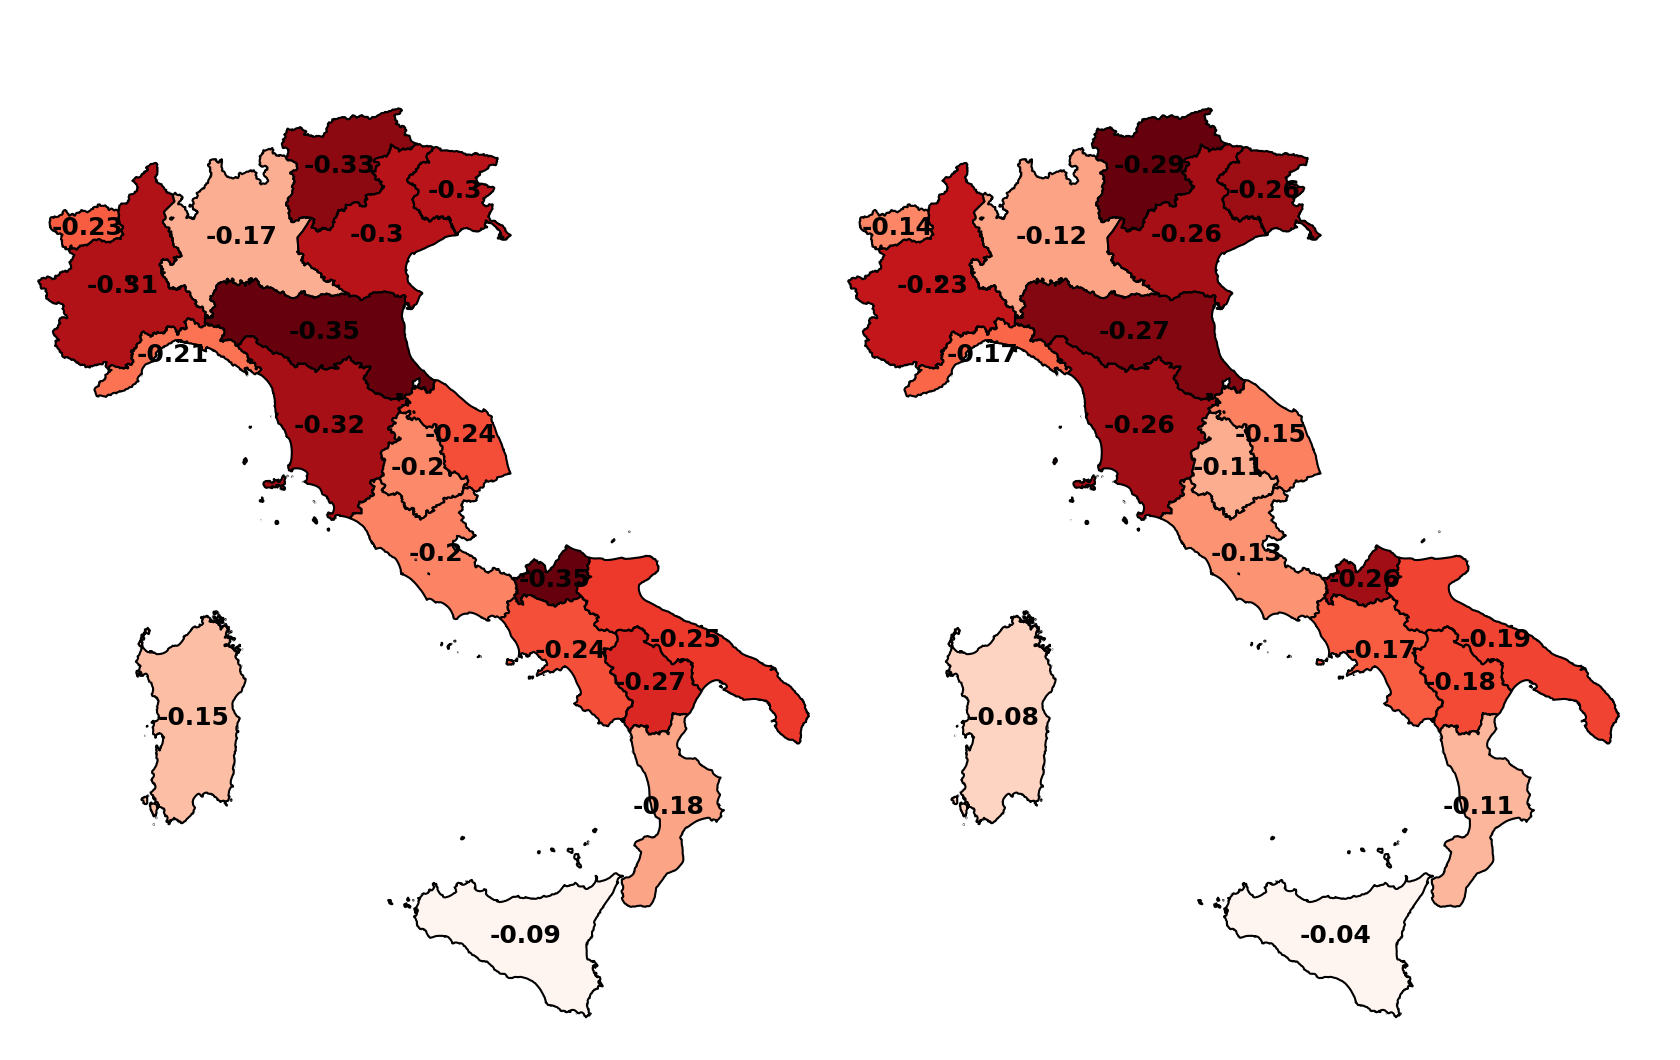

In [30]:
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(6,4),dpi=300)
gs = gridspec.GridSpec(1,2)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)

im = REGIONS_merged.plot(column="SAT_RE_mean", cmap=cmap, legend=False, edgecolor="black", linewidth=0.5, ax=ax1)

for idx, row in REGIONS.iterrows():
    if row['Region'] == 'Abruzzo':
        continue
    else:
        lon_c, lat_c = row['geometry'].centroid.xy
        lon_c = lon_c[0]
        lat_c = lat_c[0]

        val_mean_tmp = np.round(REGIONS_merged[REGIONS_merged['Region']==row['Region']]['SAT_RE_mean'].values[0],2)
        ax1.text(
            lon_c, lat_c, val_mean_tmp, 
            fontsize=6, color="k", 
            ha='center', va='center', fontweight='bold', zorder=50
        )

ax1.axis('off')

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)

im = REGIONS_merged.plot(column="DOWN_RE_mean", cmap=cmap,legend=False, edgecolor="black", linewidth=0.5, ax=ax1)

for idx, row in REGIONS.iterrows():
    if row['Region'] == 'Abruzzo':
        continue
    else:
        lon_c, lat_c = row['geometry'].centroid.xy
        lon_c = lon_c[0]
        lat_c = lat_c[0]

        val_mean_tmp = np.round(REGIONS_merged[REGIONS_merged['Region']==row['Region']]['DOWN_RE_mean'].values[0],2)
        ax1.text(
            lon_c, lat_c, val_mean_tmp, 
            fontsize=6, color="k", 
            ha='center', va='center', fontweight='bold', zorder=50
        )

ax1.axis('off')

# ============================================================================================================================
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.0, hspace=-0.1)

fig.patch.set_alpha(0)

# salida = '../figures/QERROR/SAT_DOWN_RE.png'
# print(salida)
# plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)

## Spatial Scatter plot

In [70]:
# RE_DOWN_ALL, RE_DOWN_ALL_NORM, LAT_DOWN_ALL, LON_DOWN_ALL = [], [], [], []
# RE_SAT_ALL, RE_SAT_ALL_NORM, LAT_SAT_ALL, LON_SAT_ALL = [], [], [], []
# for pos in range(len(dict_keys)):
#     RE_DOWN_tmp = DOWN_RE[dict_keys[pos]].values
#     RE_SAT_tmp = SAT_RE[dict_keys[pos]].values


#     RE_DOWN_lat = DOWN_RE_LAT[dict_keys[pos]].values
#     RE_DOWN_lon = DOWN_RE_LON[dict_keys[pos]].values

#     RE_SAT_lat = SAT_RE_LAT[dict_keys[pos]].values
#     RE_SAT_lon = SAT_RE_LON[dict_keys[pos]].values

#     RE_DOWN_lat = RE_DOWN_lat[~np.isnan(RE_SAT_tmp)]
#     RE_DOWN_lon = RE_DOWN_lon[~np.isnan(RE_SAT_tmp)]
#     RE_DOWN_tmp = RE_DOWN_tmp[~np.isnan(RE_SAT_tmp)]

#     RE_SAT_lat = RE_SAT_lat[~np.isnan(RE_SAT_tmp)]
#     RE_SAT_lon = RE_SAT_lon[~np.isnan(RE_SAT_tmp)]
#     RE_SAT_tmp = RE_SAT_tmp[~np.isnan(RE_SAT_tmp)]

#     val_DOWN = abs(RE_DOWN_tmp)
#     val_SAT = abs(RE_SAT_tmp)

#     val_DOWN_norm = (val_DOWN - np.min(val_DOWN))/(np.nanmax(val_DOWN) - np.min(val_DOWN))
#     val_SAT_norm = (val_SAT - np.min(val_SAT))/(np.nanmax(val_SAT) - np.min(val_SAT))
    
#     RE_DOWN_ALL.extend(RE_DOWN_tmp)
#     RE_DOWN_ALL_NORM.extend(val_DOWN_norm)
#     LAT_DOWN_ALL.extend(RE_DOWN_lat)
#     LON_DOWN_ALL.extend(RE_DOWN_lon)
    
#     RE_SAT_ALL.extend(RE_SAT_tmp)
#     RE_SAT_ALL_NORM.extend(val_SAT_norm)
#     LAT_SAT_ALL.extend(RE_SAT_lat)
#     LON_SAT_ALL.extend(RE_SAT_lon)

RE_DOWN_ALL, RE_DOWN_ALL_NORM, LAT_DOWN_ALL, LON_DOWN_ALL = [], [], [], []
for pos in range(len(dict_keys)):
    RE_DOWN_tmp = DOWN_RE[dict_keys[pos]].values
    RE_DOWN_lat = DOWN_RE_LAT[dict_keys[pos]].values
    RE_DOWN_lon = DOWN_RE_LON[dict_keys[pos]].values

    RE_DOWN_lat = RE_DOWN_lat[~np.isnan(RE_DOWN_tmp)]
    RE_DOWN_lon = RE_DOWN_lon[~np.isnan(RE_DOWN_tmp)]
    RE_DOWN_tmp = RE_DOWN_tmp[~np.isnan(RE_DOWN_tmp)]

    val_DOWN = abs(RE_DOWN_tmp)
    val_DOWN_norm = (val_DOWN - np.min(val_DOWN))/(np.nanmax(val_DOWN) - np.min(val_DOWN))
    
    RE_DOWN_ALL.extend(RE_DOWN_tmp)
    RE_DOWN_ALL_NORM.extend(val_DOWN_norm)
    LAT_DOWN_ALL.extend(RE_DOWN_lat)
    LON_DOWN_ALL.extend(RE_DOWN_lon)

RE_SAT_ALL, RE_SAT_ALL_NORM, LAT_SAT_ALL, LON_SAT_ALL = [], [], [], []
for pos in range(len(dict_keys)):
    RE_SAT_tmp = SAT_RE[dict_keys[pos]].values
    RE_SAT_lat = SAT_RE_LAT[dict_keys[pos]].values
    RE_SAT_lon = SAT_RE_LON[dict_keys[pos]].values

    RE_SAT_lat = RE_SAT_lat[~np.isnan(RE_SAT_tmp)]
    RE_SAT_lon = RE_SAT_lon[~np.isnan(RE_SAT_tmp)]
    RE_SAT_tmp = RE_SAT_tmp[~np.isnan(RE_SAT_tmp)]

    val_SAT = abs(RE_SAT_tmp)
    val_SAT_norm = (val_SAT - np.min(val_SAT))/(np.nanmax(val_SAT) - np.min(val_SAT))
    
    RE_SAT_ALL.extend(RE_SAT_tmp)
    RE_SAT_ALL_NORM.extend(val_SAT_norm)
    LAT_SAT_ALL.extend(RE_SAT_lat)
    LON_SAT_ALL.extend(RE_SAT_lon)

In [68]:
levels = np.arange(-0.8,0.9,0.1)
# ticks = np.arange(-1.6,2.0,0.4)

norm = mcolors.BoundaryNorm(boundaries=levels, ncolors=256)

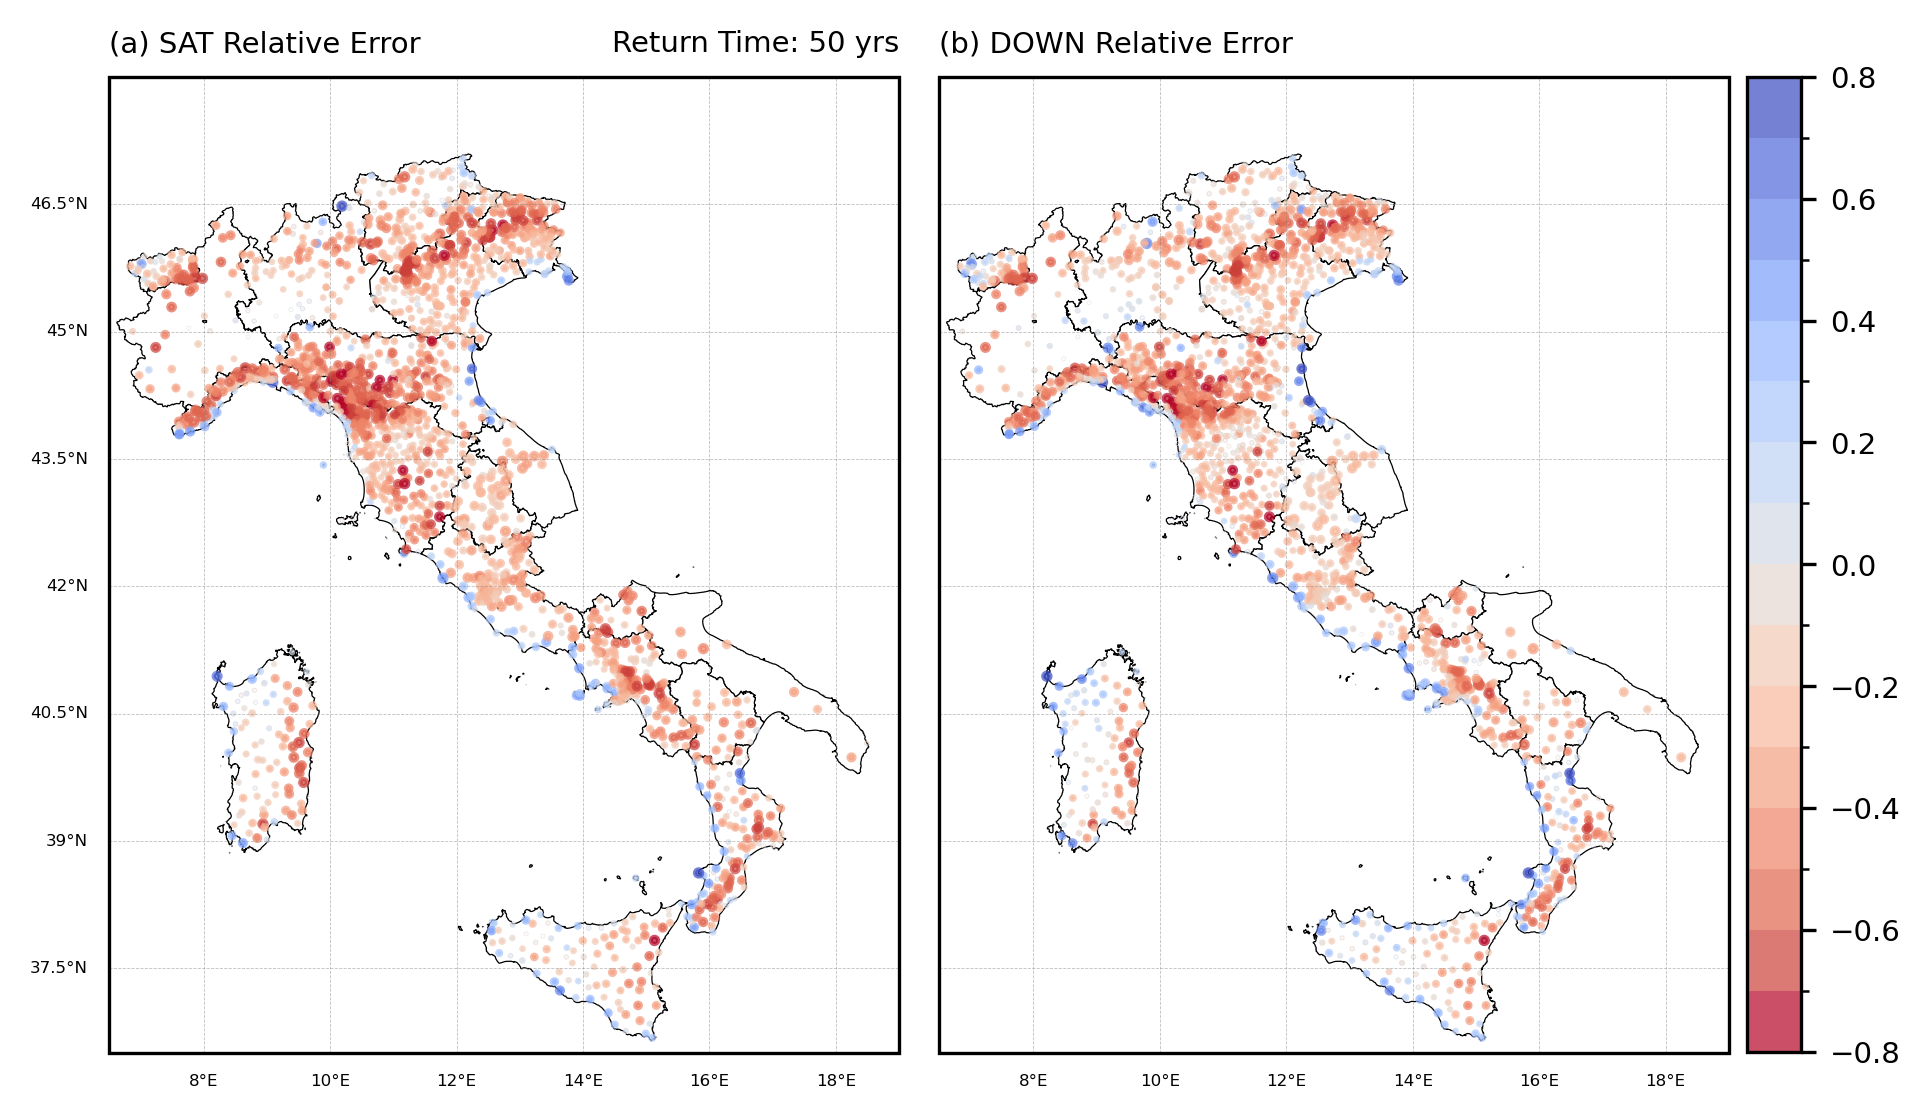

In [71]:
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(6,4),dpi=300)
gs = gridspec.GridSpec(1,2)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)

im = REGIONS_merged.plot(legend=False, color='white', edgecolor="black", linewidth=0.3, ax=ax1)
a1 = ax1.scatter(LON_SAT_ALL, LAT_SAT_ALL, c=RE_SAT_ALL, cmap='coolwarm_r', s=np.array(RE_SAT_ALL_NORM)*3, alpha=0.7, norm=norm)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels = True

gl.xlabel_style = {'size': 4, 'color': 'k'}
gl.ylabel_style = {'size': 4, 'color': 'k'}

# cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6) 

ax1.set_title('(a) SAT Relative Error', fontsize=7, loc='left')
ax1.set_title('Return Time: 50 yrs', fontsize=7, loc='right')

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)

im = REGIONS_merged.plot(legend=False, color='white', edgecolor="black", linewidth=0.3, ax=ax1)
a1 = ax1.scatter(LON_DOWN_ALL, LAT_DOWN_ALL, c=RE_DOWN_ALL, cmap='coolwarm_r', s=np.array(RE_DOWN_ALL_NORM)*3, alpha=0.7, norm=norm)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels =False

gl.xlabel_style = {'size': 4, 'color': 'k'}
gl.ylabel_style = {'size': 4, 'color': 'k'}

# cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6) 

ax1.set_title('(b) DOWN Relative Error', fontsize=7, loc='left')

# ============================================================================================================================
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.05, hspace=0.1)

cbar_ax = fig.add_axes([0.96, 0.094, 0.03, 0.813])#0.96
cbar = fig.colorbar(a1, cax=cbar_ax, orientation='vertical')
cbar.ax.tick_params(labelsize=7)

In [79]:
levels_dif = np.arange(-0.5,0.6,0.1)

norm_diff = mcolors.BoundaryNorm(boundaries=levels_dif, ncolors=256)

Text(1.0, 1.0, 'Return Time: 50 yrs')

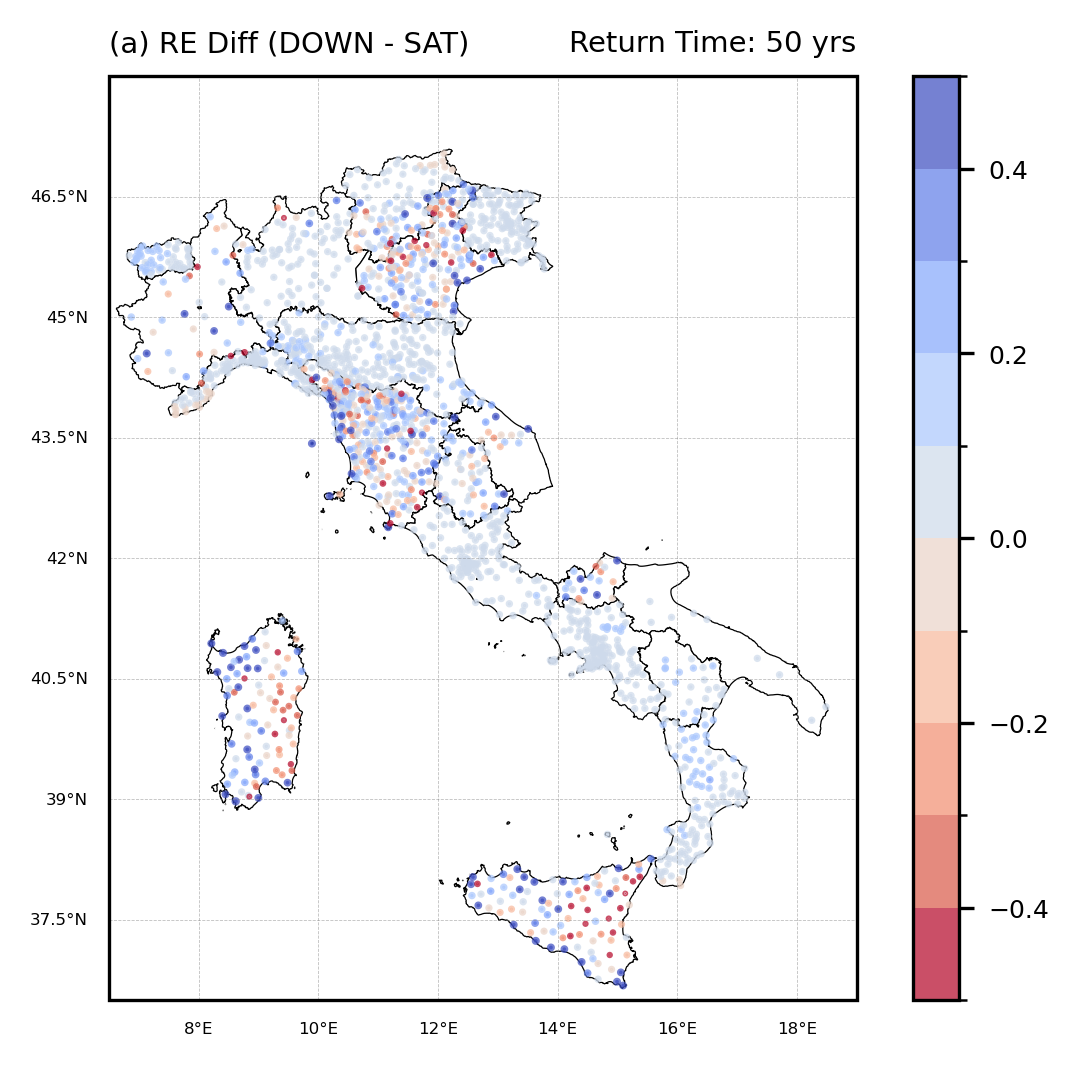

In [80]:
DIFF = (np.array(RE_DOWN_ALL))-(np.array(RE_SAT_ALL[0:-1]))
DIFF_NORM = (DIFF - np.nanmin(DIFF))/(np.nanmax(DIFF) - np.nanmin(DIFF))

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(6,4),dpi=300)
gs = gridspec.GridSpec(1,1)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)

im = REGIONS_merged.plot(legend=False, color='white', edgecolor="black", linewidth=0.3, ax=ax1)
a1 = ax1.scatter(LON_DOWN_ALL, LAT_DOWN_ALL, c=DIFF, cmap='coolwarm_r', s=DIFF_NORM, alpha=0.7, norm=norm_diff)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels = True

gl.xlabel_style = {'size': 4, 'color': 'k'}
gl.ylabel_style = {'size': 4, 'color': 'k'}

cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
cbar.ax.tick_params(labelsize=6) 

ax1.set_title('(a) RE Diff (DOWN - SAT)', fontsize=7, loc='left')
ax1.set_title('Return Time: 50 yrs', fontsize=7, loc='right')

## Weibull Parameters

In [81]:
dir_in = os.path.join(obs_base, 'QC', 'DATA_1dy', 'RE_ENSEMBLE_SAT', 'OBS_Weibull_N.csv')
OBS_N = pd.read_csv(dir_in)

dir_in = os.path.join(obs_base, 'QC', 'DATA_1dy', 'RE_ENSEMBLE_SAT', 'OBS_Weibull_C.csv')
OBS_C = pd.read_csv(dir_in)

dir_in = os.path.join(obs_base, 'QC', 'DATA_1dy', 'RE_ENSEMBLE_SAT', 'OBS_Weibull_W.csv')
OBS_W = pd.read_csv(dir_in)

In [82]:
dir_in = os.path.join(obs_base, 'QC', 'DATA_1dy', 'RE_ENSEMBLE_SAT', 'SAT_Weibull_N.csv')
SAT_N = pd.read_csv(dir_in)

dir_in = os.path.join(obs_base, 'QC', 'DATA_1dy', 'RE_ENSEMBLE_SAT', 'SAT_Weibull_C.csv')
SAT_C = pd.read_csv(dir_in)

dir_in = os.path.join(obs_base, 'QC', 'DATA_1dy', 'RE_ENSEMBLE_SAT', 'SAT_Weibull_W.csv')
SAT_W = pd.read_csv(dir_in)

In [83]:
dir_in = os.path.join(obs_base, 'QC', 'DATA_1dy', 'RE_ENSEMBLE_SAT', 'DOWN_Weibull_N.csv')
DOWN_N = pd.read_csv(dir_in)

dir_in = os.path.join(obs_base, 'QC', 'DATA_1dy', 'RE_ENSEMBLE_SAT', 'DOWN_Weibull_C.csv')
DOWN_C = pd.read_csv(dir_in)

dir_in = os.path.join(obs_base, 'QC', 'DATA_1dy', 'RE_ENSEMBLE_SAT', 'DOWN_Weibull_W.csv')
DOWN_W = pd.read_csv(dir_in)

In [84]:
OBS_N_data = OBS_N.to_numpy().reshape(-1,1)
SAT_N_data = SAT_N.to_numpy().reshape(-1,1)
DOWN_N_data = DOWN_N.to_numpy().reshape(-1,1)

OBS_C_data = OBS_C.to_numpy().reshape(-1,1)
SAT_C_data = SAT_C.to_numpy().reshape(-1,1)
DOWN_C_data = DOWN_C.to_numpy().reshape(-1,1)

OBS_W_data = OBS_W.to_numpy().reshape(-1,1)
SAT_W_data = SAT_W.to_numpy().reshape(-1,1)
DOWN_W_data = DOWN_W.to_numpy().reshape(-1,1)

In [85]:
N_min = min(np.nanmin(OBS_N_data), np.nanmin(SAT_N_data), np.nanmin(DOWN_N_data))
N_max = max(np.nanmax(OBS_N_data), np.nanmax(SAT_N_data), np.nanmax(DOWN_N_data))

C_min = min(np.nanmin(OBS_C_data), np.nanmin(SAT_C_data), np.nanmin(DOWN_C_data))
C_max = max(np.nanmax(OBS_C_data), np.nanmax(SAT_C_data), np.nanmax(DOWN_C_data))

W_min = min(np.nanmin(OBS_W_data), np.nanmin(SAT_W_data), np.nanmin(DOWN_W_data))
W_max = max(np.nanmax(OBS_W_data), np.nanmax(SAT_W_data), np.nanmax(DOWN_W_data))

array([87., 68., 39., ..., 82., 63., 83.], shape=(35060,))

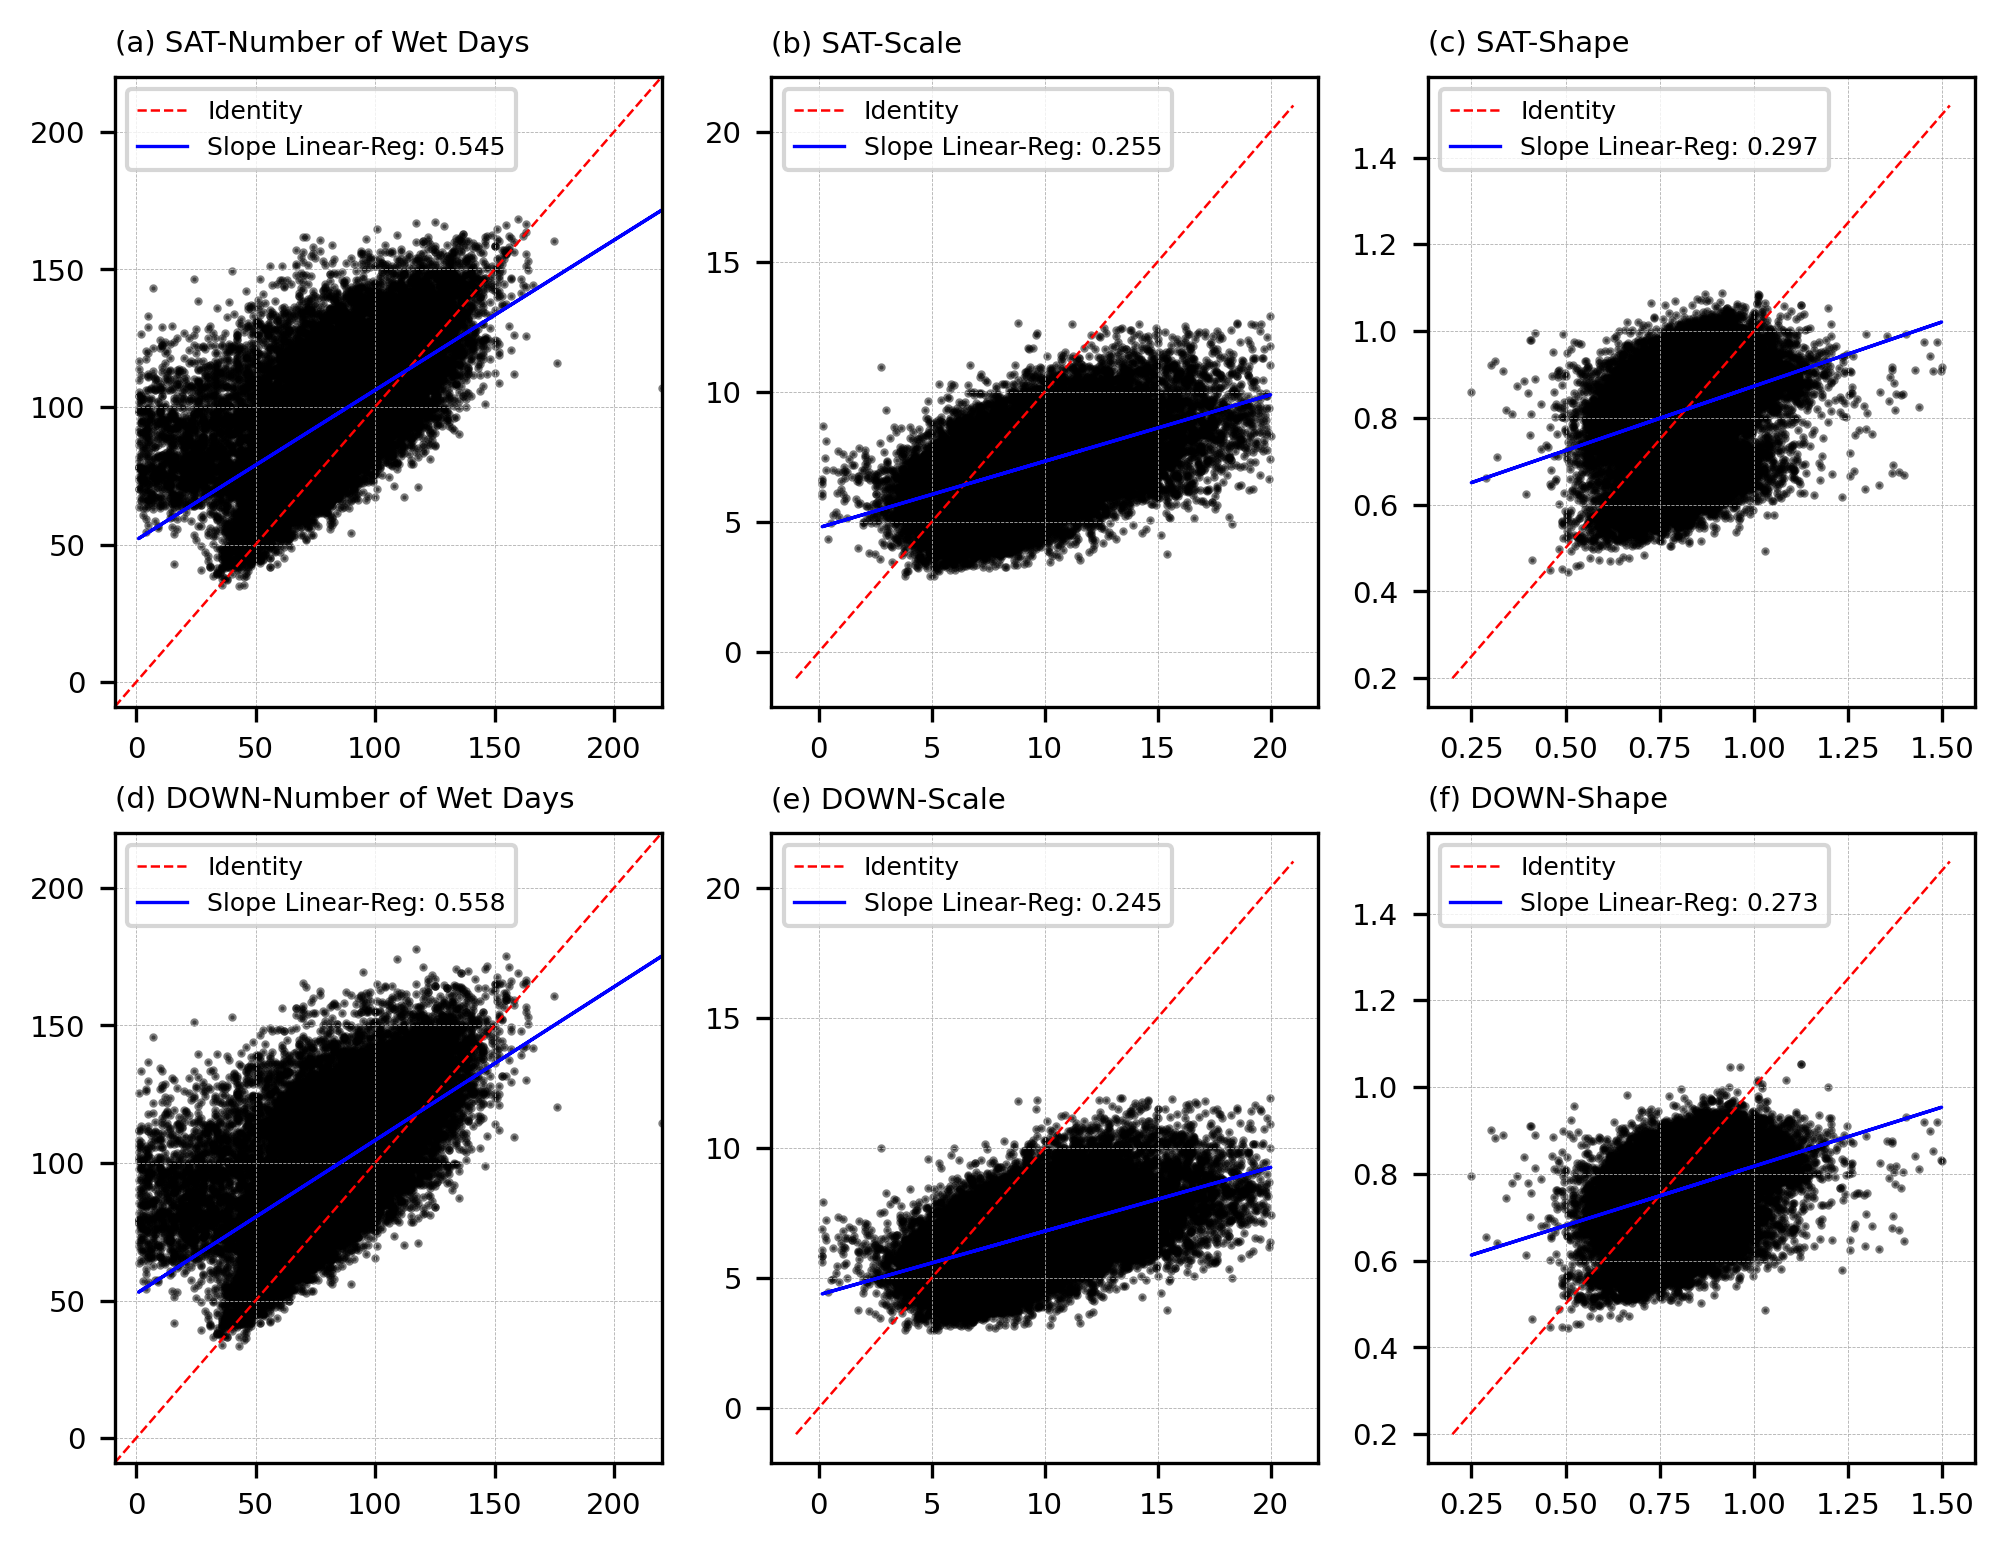

In [116]:
fig = plt.figure(figsize=(8,6),dpi=300)
gs = gridspec.GridSpec(2,3)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0])
ax1.scatter(OBS_N_data[~np.isnan(OBS_N_data)], SAT_N_data[~np.isnan(OBS_N_data)], color='k', s=1, alpha=0.5)
ax1.plot([N_min-10, N_max], [N_min-10, N_max], color='r', linestyle='--', linewidth=0.6, label='Identity')

x_in = OBS_N_data[~np.isnan(OBS_N_data)]
y_in = SAT_N_data[~np.isnan(OBS_N_data)]
slope, intercept, r_value, p_value, std_err = stats.linregress(x_in,y_in)
x_vals = np.array(x_in)
y_vals = intercept + slope * x_vals
ax1.plot(x_vals, y_vals, color='blue', linewidth=0.8, label=f'Slope Linear-Reg: {np.round(slope,3)}')

ax1.grid(linewidth=0.2, linestyle='--')
ax1.set_xlim(N_min-10, N_max)
ax1.set_ylim(N_min-10, N_max)
ax1.tick_params(axis='both', which='major', labelsize=7)
ax1.set_title('(a) SAT-Number of Wet Days', loc='left', fontsize=7)
ax1.legend(fontsize=6)

# ============================================================================================================================
val_max = 20
ax1 = plt.subplot(gs[0, 1])
ax1.scatter(OBS_C_data[OBS_C_data<val_max], SAT_C_data[OBS_C_data<val_max], color='k', s=1, alpha=0.5)
ax1.plot([-1, 21], [-1, 21], color='r', linestyle='--', linewidth=0.6, label='Identity')

x_in = OBS_C_data[OBS_C_data<val_max]
y_in = SAT_C_data[OBS_C_data<val_max]
slope, intercept, r_value, p_value, std_err = stats.linregress(x_in,y_in)
x_vals = np.array(x_in)
y_vals = intercept + slope * x_vals
ax1.plot(x_vals, y_vals, color='blue', linewidth=0.8, label=f'Slope Linear-Reg: {np.round(slope,3)}')

ax1.grid(linewidth=0.2, linestyle='--')
ax1.tick_params(axis='both', which='major', labelsize=7)
ax1.set_title('(b) SAT-Scale', loc='left', fontsize=7)
ax1.legend(fontsize=6)

# ============================================================================================================================
val_max = 1.5
ax1 = plt.subplot(gs[0, 2])
ax1.scatter(OBS_W_data[OBS_W_data<val_max], SAT_W_data[OBS_W_data<val_max], color='k', s=1, alpha=0.5)
ax1.plot([0.2, 1.52], [0.2, 1.52], color='r', linestyle='--', linewidth=0.6, label='Identity')

x_in = OBS_W_data[OBS_W_data<val_max]
y_in = SAT_W_data[OBS_W_data<val_max]
slope, intercept, r_value, p_value, std_err = stats.linregress(x_in,y_in)
x_vals = np.array(x_in)
y_vals = intercept + slope * x_vals
ax1.plot(x_vals, y_vals, color='blue', linewidth=0.8, label=f'Slope Linear-Reg: {np.round(slope,3)}')

ax1.grid(linewidth=0.2, linestyle='--')
ax1.tick_params(axis='both', which='major', labelsize=7)
ax1.set_title('(c) SAT-Shape', loc='left', fontsize=7)
ax1.legend(fontsize=6)

# ============================================================================================================================
ax1 = plt.subplot(gs[1, 0])
ax1.scatter(OBS_N_data[~np.isnan(OBS_N_data)], DOWN_N_data[~np.isnan(OBS_N_data)], color='k', s=1, alpha=0.5)
ax1.plot([N_min-10, N_max], [N_min-10, N_max], color='r', linestyle='--', linewidth=0.6, label='Identity')

x_in = OBS_N_data[~np.isnan(OBS_N_data)]
y_in = DOWN_N_data[~np.isnan(OBS_N_data)]
slope, intercept, r_value, p_value, std_err = stats.linregress(x_in,y_in)
x_vals = np.array(x_in)
y_vals = intercept + slope * x_vals
ax1.plot(x_vals, y_vals, color='blue', linewidth=0.8, label=f'Slope Linear-Reg: {np.round(slope,3)}')

ax1.grid(linewidth=0.2, linestyle='--')
ax1.set_xlim(N_min-10, N_max)
ax1.set_ylim(N_min-10, N_max)
ax1.tick_params(axis='both', which='major', labelsize=7)
ax1.set_title('(d) DOWN-Number of Wet Days', loc='left', fontsize=7)
ax1.legend(fontsize=6)

# ============================================================================================================================
val_max = 20
ax1 = plt.subplot(gs[1, 1])
ax1.scatter(OBS_C_data[OBS_C_data<val_max], DOWN_C_data[OBS_C_data<val_max], color='k', s=1, alpha=0.5)
ax1.plot([-1, 21], [-1, 21], color='r', linestyle='--', linewidth=0.6, label='Identity')

x_in = OBS_C_data[OBS_C_data<val_max]
y_in = DOWN_C_data[OBS_C_data<val_max]
slope, intercept, r_value, p_value, std_err = stats.linregress(x_in,y_in)
x_vals = np.array(x_in)
y_vals = intercept + slope * x_vals
ax1.plot(x_vals, y_vals, color='blue', linewidth=0.8, label=f'Slope Linear-Reg: {np.round(slope,3)}')

ax1.grid(linewidth=0.2, linestyle='--')
ax1.tick_params(axis='both', which='major', labelsize=7)
ax1.set_title('(e) DOWN-Scale', loc='left', fontsize=7)
ax1.legend(fontsize=6)

# ============================================================================================================================
val_max = 1.5
ax1 = plt.subplot(gs[1, 2])
ax1.scatter(OBS_W_data[OBS_W_data<val_max], DOWN_W_data[OBS_W_data<val_max], color='k', s=1, alpha=0.5)
ax1.plot([0.2, 1.52], [0.2, 1.52], color='r', linestyle='--', linewidth=0.6, label='Identity')

x_in = OBS_W_data[OBS_W_data<val_max]
y_in = DOWN_W_data[OBS_W_data<val_max]
slope, intercept, r_value, p_value, std_err = stats.linregress(x_in,y_in)
x_vals = np.array(x_in)
y_vals = intercept + slope * x_vals
ax1.plot(x_vals, y_vals, color='blue', linewidth=0.8, label=f'Slope Linear-Reg: {np.round(slope,3)}')

ax1.grid(linewidth=0.2, linestyle='--')
ax1.tick_params(axis='both', which='major', labelsize=7)
ax1.set_title('(f) DOWN-Shape', loc='left', fontsize=7)
ax1.legend(fontsize=6)